In [39]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [40]:
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=font_path, size=12).get_name()
plt.rc('font', family=font_name)

In [41]:
file_paths = ['dataset D1.xlsx', 'dataset D2.xlsx', 'dataset D3.xlsx']
df1 = pd.read_excel(file_paths[2])

In [38]:
filtered_df = df1[df1['text'].str.len() >= 10]
average_length = filtered_df['text'].str.len().mean()
print("Average Length:", average_length)

Average Length: 24.69150484770249


In [42]:
grouped_df = df1.groupby('Emotion')
grouped_dfs = [group for _, group in grouped_df]

In [43]:
for i, df in enumerate(grouped_dfs):
    print(f"Group {i+1}:", df['Emotion'].unique(), end=' ')
    print('샘플수', len(df))
    

Group 1: ['공포'] 샘플수 5468
Group 2: ['놀람'] 샘플수 5898
Group 3: ['분노'] 샘플수 5665
Group 4: ['슬픔'] 샘플수 5267
Group 5: ['중립'] 샘플수 4830
Group 6: ['행복'] 샘플수 6037
Group 7: ['혐오'] 샘플수 5429


In [49]:
pd.set_option('display.max_colwidth', None)
grouped_dfs[5].sample(10)

text  \
28157                                 지도자는 국민을 위한 정치적소신과 철학이 뚜렷해야 한다 멋지다!!   
28348                               아무리봐도 백쌤 만큼 손쉽게 맛잇게 빠르게 만드는 요리사는없는것같아요   
29666                          항상 청량폭발하는 메인보컬 도겸오빠 7400일 너무 축하하고 컴백도 축하해요!   
30937                                   주시면 감사하게 잘쓰고 다른 필요한 분에게 물려드릴께염...ㅠ   
29347                                                               맛있겠다ㅜㅜ   
27791                                         왜 난 말하는데 당황하는 모습에 개웃겼는데 ㅋㅋㅋㅋ   
31903                                                  재석오빠.오빠...........!   
29284                                                쥐훈이 간만에맘에드는컷그렸군 수고 ㅎㅎ   
27241                                                암튼 올시즌 첫 홈런 축하드립니다~~~   
32011  윤정수가 옆에서 그건 박보검에게 벌칙이라니아니라고 엑스표시하는 박보검 웃김 귀여움 박서준옆에서 빵터지고 혜리 살짝질투 ㅎ   

      Emotion  
28157      행복  
28348      행복  
29666      행복  
30937      행복  
29347      행복  
27791      행복  
31903      행복  
29284      행복  
27241      행복  
32011      행복

In [13]:
# Initialize variables
max_length = 5000
emotion_sentences = []

# Iterate through each dataframe in grouped_dfs
for df in grouped_dfs:
    current_length = 0
    current_string = ""
    result = []
    # Iterate through each text in the dataframe
    for text in df['text']:
        # Check if adding the current text will exceed the maximum length
        if current_length + len(text) <= max_length:
            current_string += (text + ' ')
            current_length += len(text)+1
        else:
            # Add the current string to the result list and reset variables
            result.append(current_string.strip())
            current_string = text + ' '
            current_length = len(text)+1
    emotion_sentences.append(result)

In [14]:
len(emotion_sentences)

7

In [17]:
ACCESS_KEY = '#####USER_ACCESS_KEY#####' #your own key
ANALYSIS_CODE = 'ner'

In [18]:
import urllib3
import json

In [19]:
openApiURL = "http://aiopen.etri.re.kr:8000/WiseNLU"

accessKey = ACCESS_KEY
analysisCode = ANALYSIS_CODE

In [20]:
def get_etri_NERdata(text):
    try:
        requestJson = {
        "argument": {
            "text": text,
            "analysis_code": analysisCode
            }
        }
        
        http = urllib3.PoolManager()
        response = http.request(
            "POST",
            openApiURL,
            headers={"Content-Type": "application/json; charset=UTF-8", "Authorization" :  accessKey},
            body=json.dumps(requestJson)
        )
        
        if  response.status != 200:
            print("[error] %s" % response.data)
            return None
        
        result = str(response.data,"utf-8")
        return result
    
    except Exception as e:
        # Handle the exception
        print(e)
        return None

In [21]:
#emotion_label = ['기쁨', '당황', '분노', '불안', '상처', '슬픔']
#emotion_label = ['기쁨', '당황', '무감정', '분노', '불안', '상처', '슬픔']
emotion_label = ['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오']

In [22]:
emotion_ner = {}
emotion_ner_counts = {}

for i in range(len(emotion_sentences)):
    sentences = emotion_sentences[i]
    NE_dict = {}
    sentence_with_NE_counts = 0
    for sentence in tqdm(sentences):
        result = get_etri_NERdata(sentence)
        if result != None:
            j = json.loads(result)
            for sent in j['return_object']['sentence']:
                NE_found = False  # 현재 문장에서 개체명을 찾았는지 여부
                for item in sent['NE']:
                    NE_tag = item['type']
                    word = item['text']
                    if NE_tag not in NE_dict:
                        NE_dict[NE_tag] = []
                    NE_dict[NE_tag].append(word)
                    NE_found = True
                if NE_found:
                    sentence_with_NE_counts += 1
    emotion_ner[emotion_label[i]] = NE_dict
    emotion_ner_counts[emotion_label[i]] = sentence_with_NE_counts

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [23]:
emotion_ner.keys()

dict_keys(['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오'])

In [28]:
emotion_ner_counts

{'공포': 1809,
 '놀람': 2484,
 '분노': 2076,
 '슬픔': 1651,
 '중립': 1751,
 '행복': 2013,
 '혐오': 2001}

In [29]:
for key, values in emotion_ner.items():
    print('####',key,'####', end='\t')
    print('개체명태그', len(values.keys()),'종류', end='\t')
    unique_word_count = 0
    word_count = 0
    for tag, words in values.items():
        unique_word_count += len(set(words))
        word_count += len(words)
    print(unique_word_count,'단어', end='\t')
    print(word_count,'회')
    

#### 공포 ####	개체명태그 114 종류	1915 단어	3446 회
#### 놀람 ####	개체명태그 119 종류	3151 단어	5445 회
#### 분노 ####	개체명태그 118 종류	2571 단어	5646 회
#### 슬픔 ####	개체명태그 100 종류	1715 단어	3457 회
#### 중립 ####	개체명태그 126 종류	2921 단어	5384 회
#### 행복 ####	개체명태그 115 종류	2683 단어	5556 회
#### 혐오 ####	개체명태그 117 종류	2793 단어	6105 회


In [51]:
import matplotlib.pyplot as plt

def draw_bar_graph(emotion, top_n):
    
    # 각 키에 대한 값 리스트의 길이 계산
    length_dict = {key: len(values) for key, values in emotion_ner[emotion].items()}

    # 키와 값을 추출하고 값을 기준으로 내림차순 정렬
    sorted_items = sorted(length_dict.items(), key=lambda item: item[1], reverse=True)

    # 상위 top_n개 항목만 선택
    sorted_items_top = sorted_items[:top_n]

    # 상위 n개 항목을 다시 오름차순으로 정렬하여 높은 빈도의 개체가 위에 오도록 함
    sorted_items_top_reversed = sorted(sorted_items_top, key=lambda item: item[1])

    # 정렬된 키와 값을 분리
    keys, values = zip(*sorted_items_top_reversed)

    # 막대 그래프 그리기
    plt.figure(figsize=(6, 4), dpi=300)
    bars = plt.barh(keys, values, color='skyblue')

    # 막대 오른쪽 끝에 숫자 표시
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
                 f'{bar.get_width()}', 
                 va='center', ha='left')

    plt.xlabel('어휘 수')
    title = f'D3 \'{emotion}\' 텍스트의 주요 개체명 어휘 유형 (상위 10 종류)'
    plt.title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

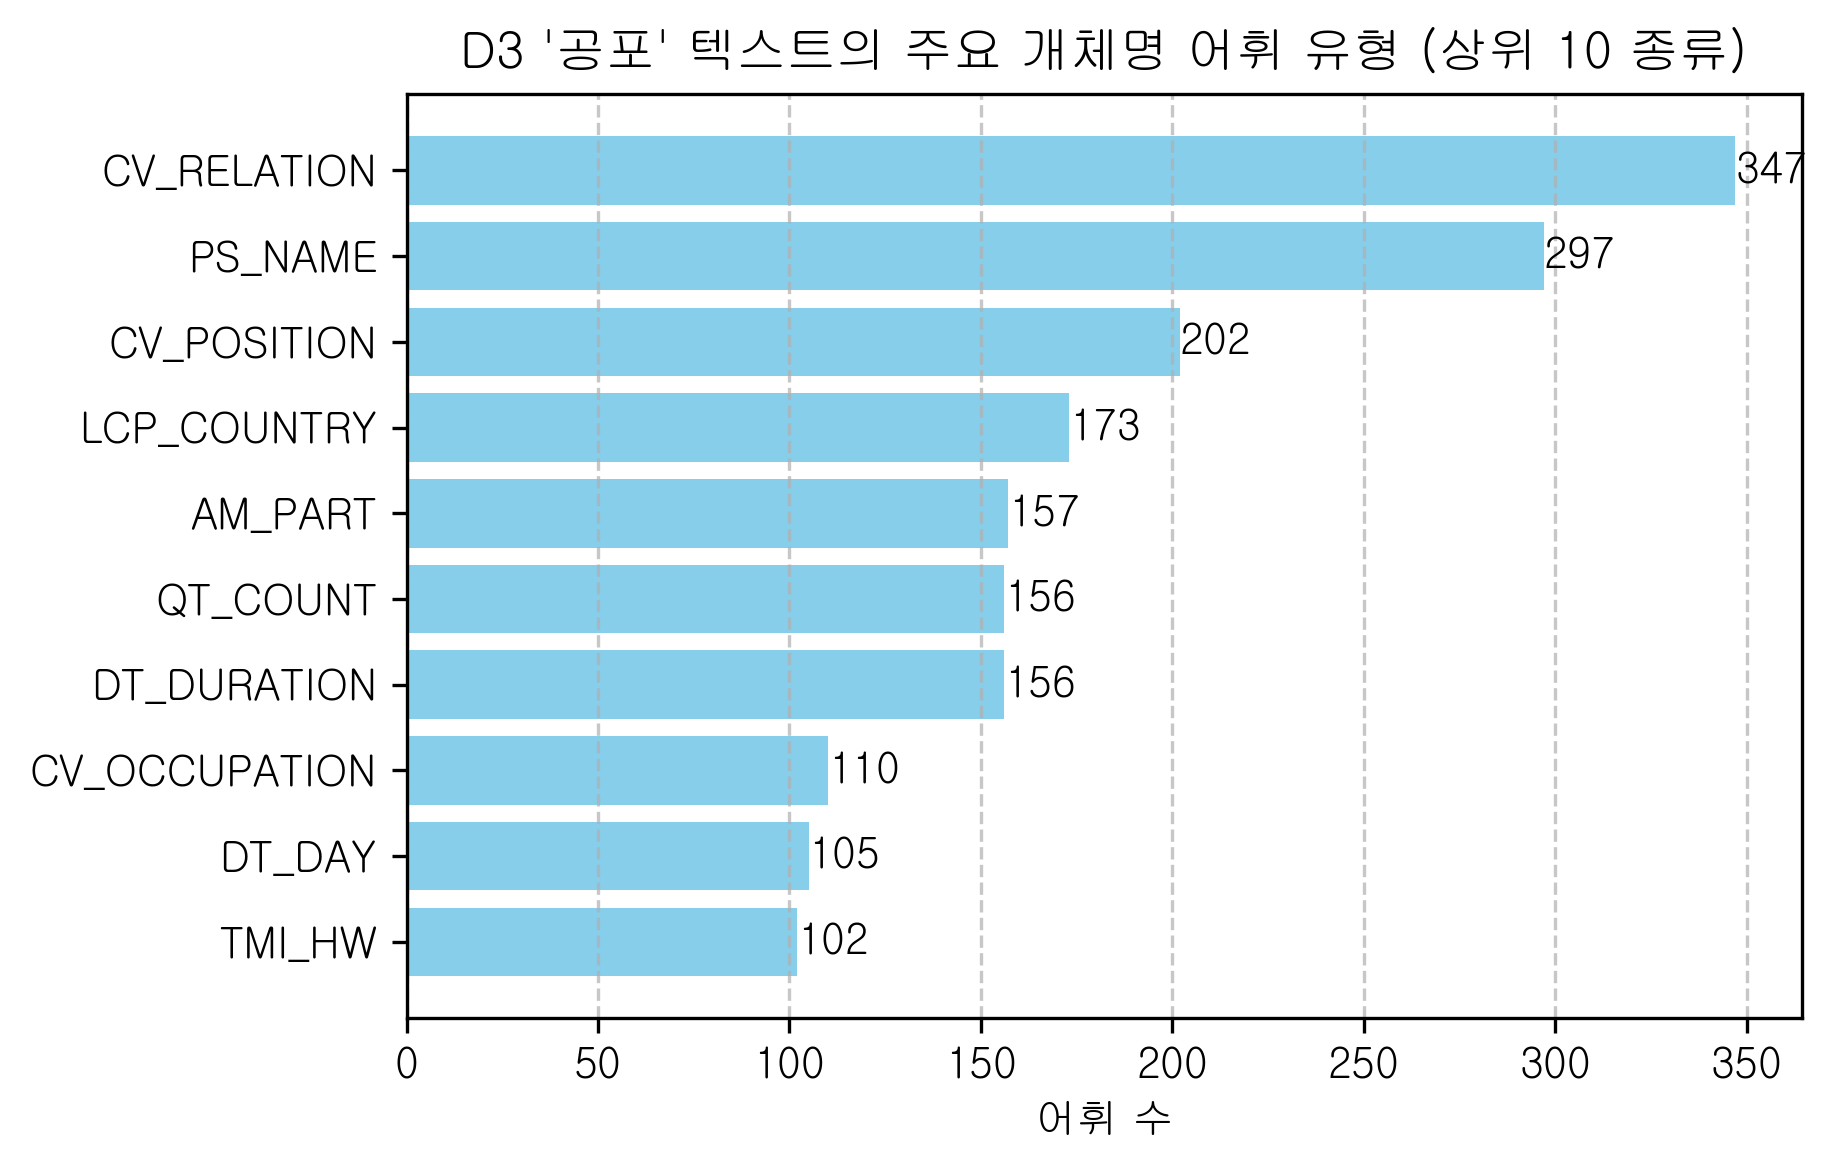

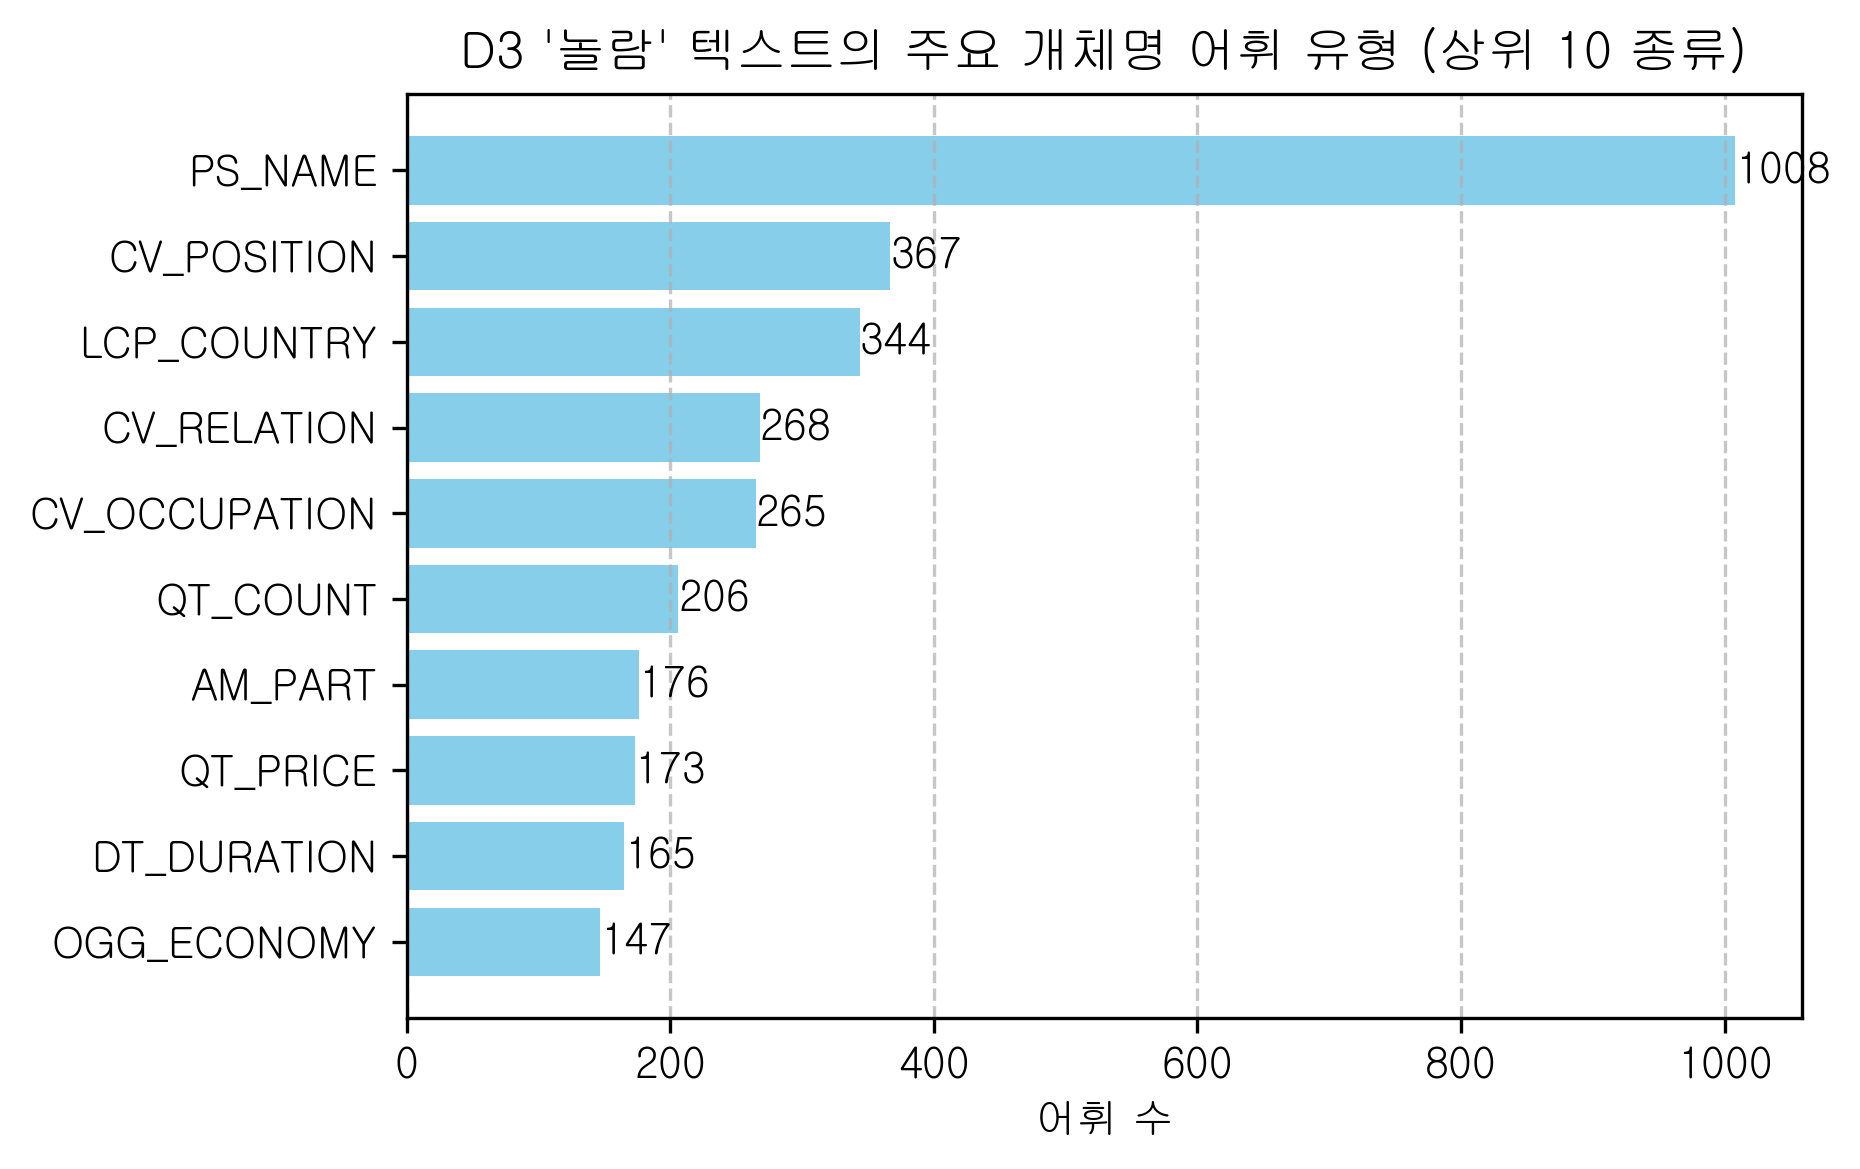

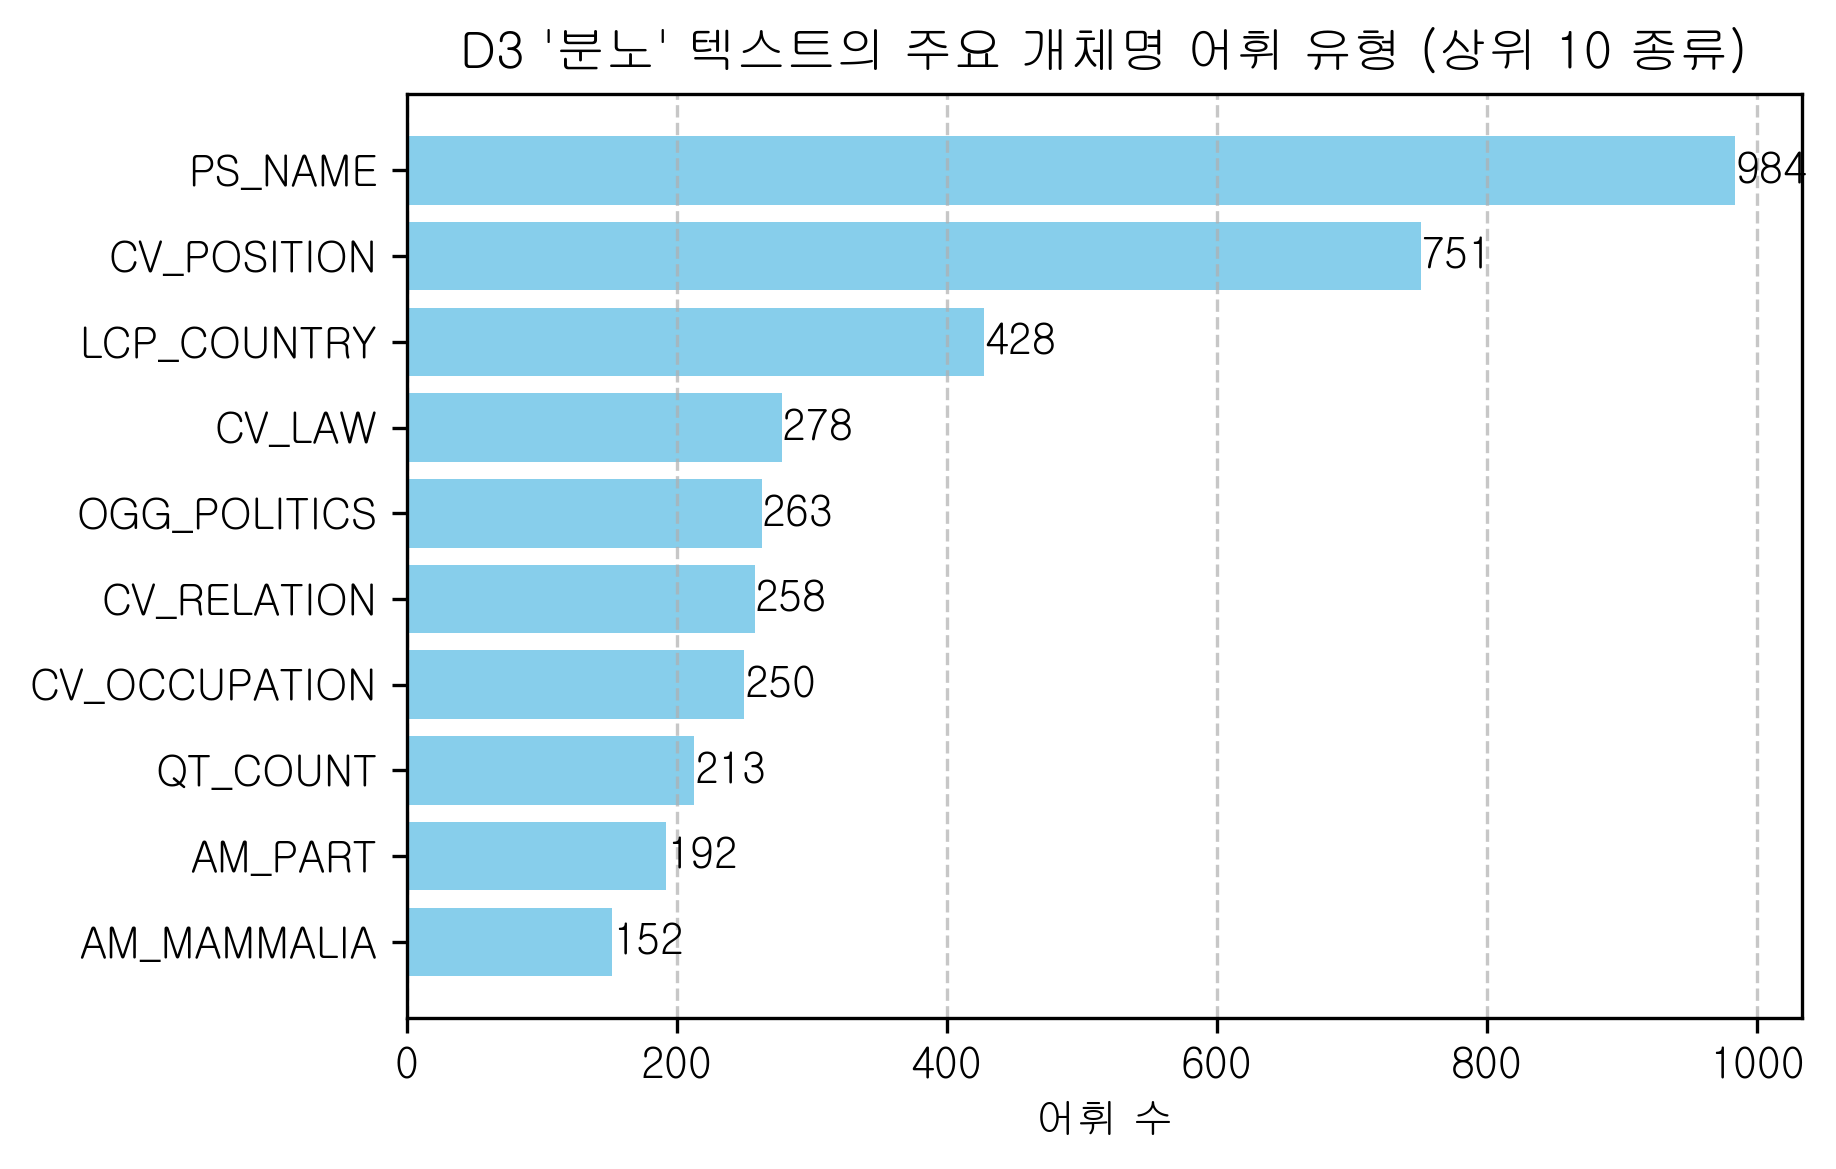

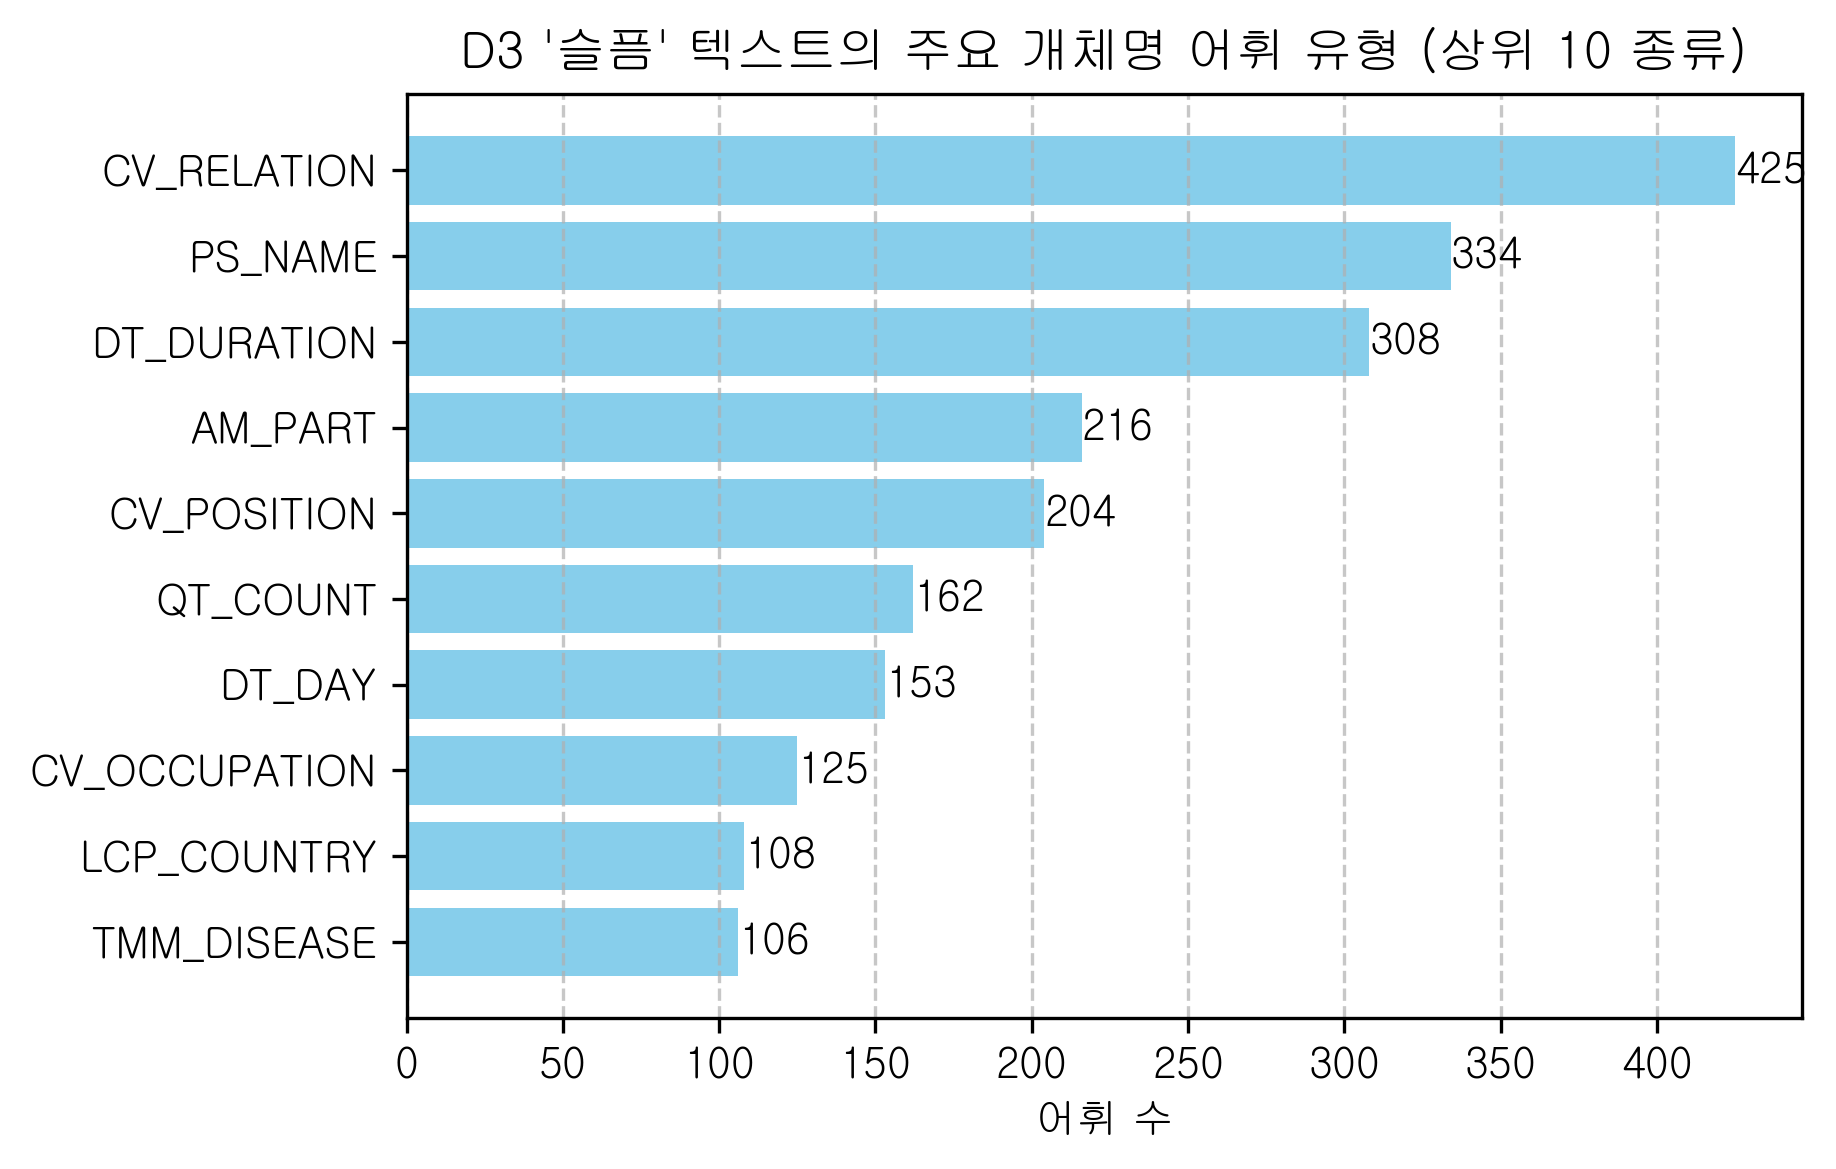

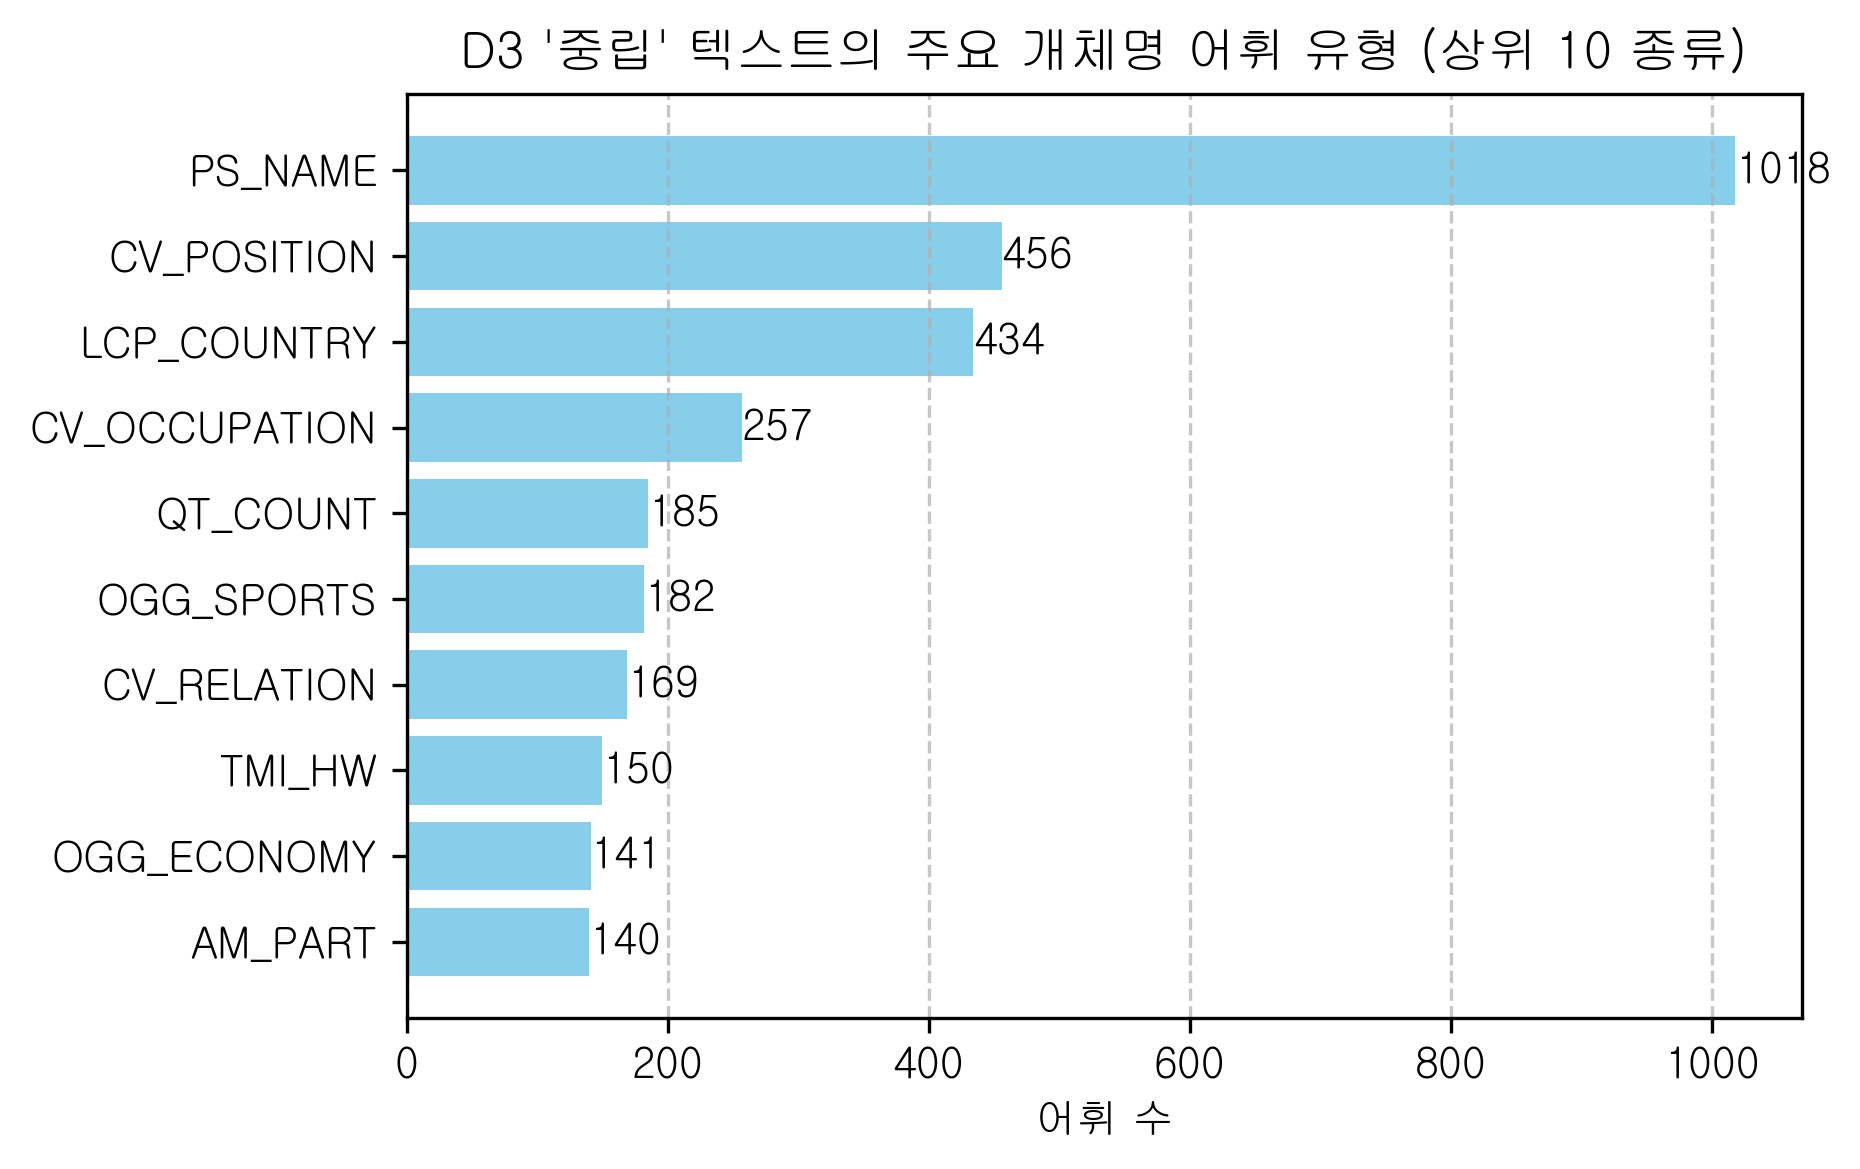

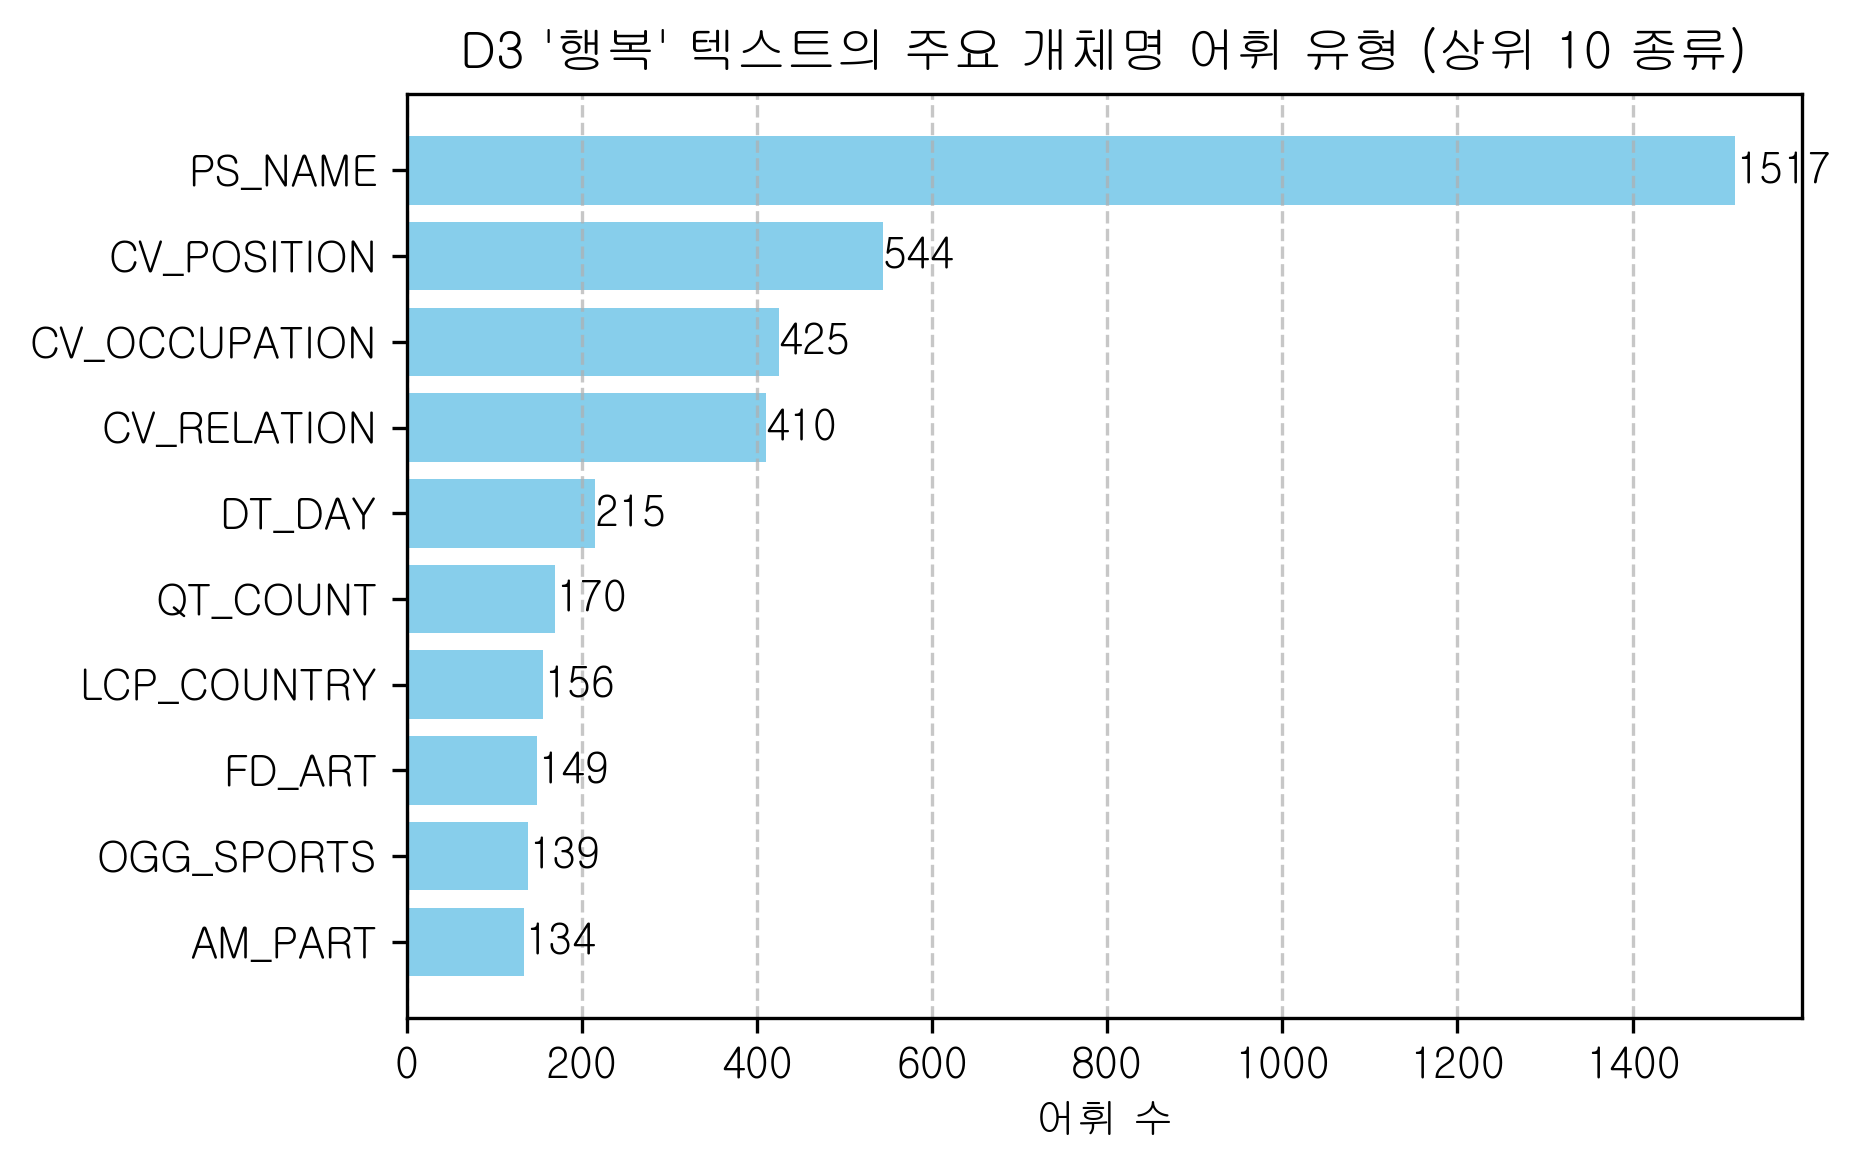

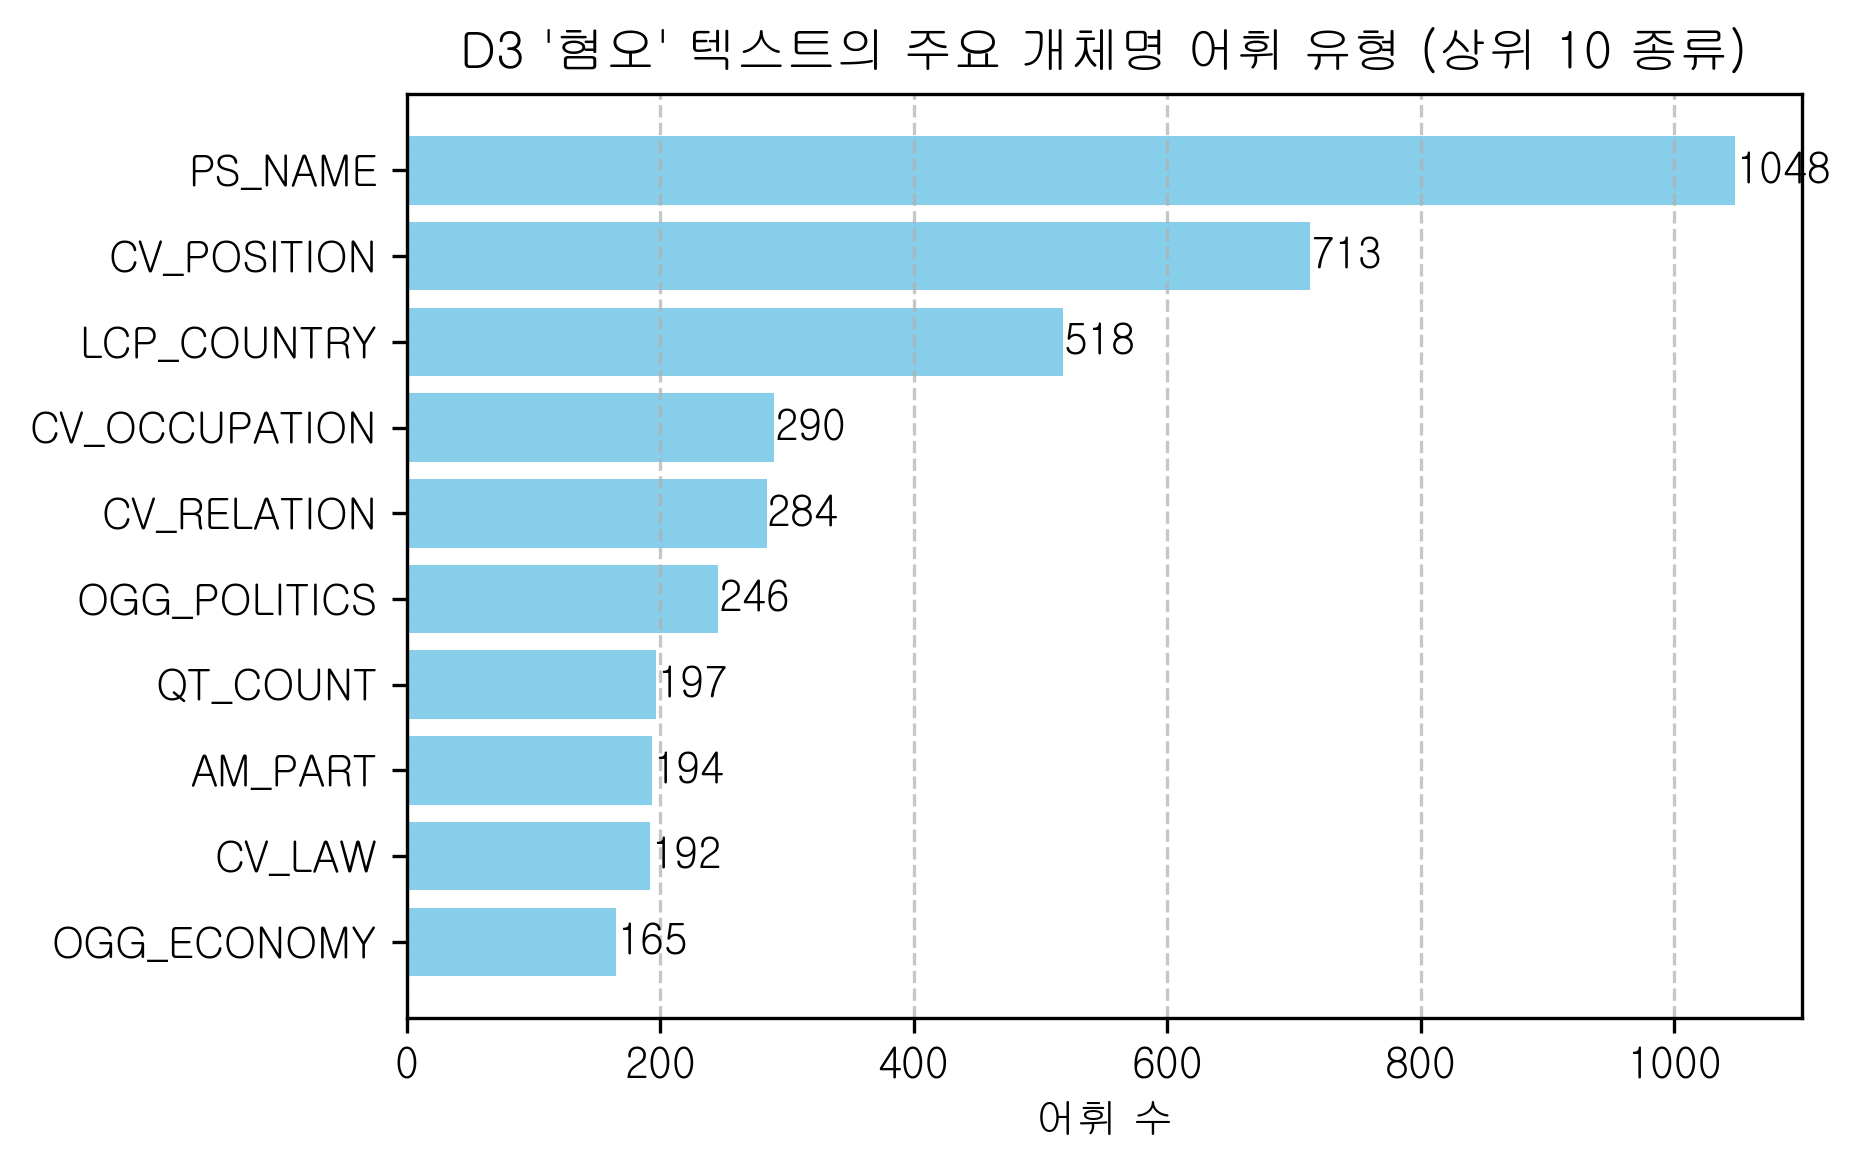

In [52]:
for emotion in emotion_ner.keys():
    draw_bar_graph(emotion, 10)

In [60]:
from collections import Counter

# '기쁨' 감정의 'CV_RELATION' 데이터에서 단어들의 빈도수 계산
#word_counts = Counter(emotion_ner['기쁨']['AM_PART'])
#word_counts = Counter(emotion_ner['기쁨']['PS_NAME'])
word_counts = Counter(emotion_ner['분노']['CV_RELATION'])

# 빈도수가 높은 순으로 단어들 정렬
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# 결과 출력
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

새끼: 51
자식: 19
딸: 17
부모: 11
친구: 11
아줌마: 11
가족: 9
엄마: 8
남편: 7
아빠: 6
여자친구: 5
이새끼: 5
아들: 4
유가족: 4
아버지: 4
부인: 3
남자친구: 3
오빠: 3
형: 3
부자: 3
전여자친구: 2
모녀: 2
할배: 2
누나: 2
남동생: 2
아우: 2
처형: 2
마누라: 2
아내: 2
처: 1
사생: 1
자손: 1
후손: 1
비: 1
쪽바리새끼: 1
새끼야경찰: 1
미친개: 1
또라이새끼: 1
폰팔이새끼: 1
연인: 1
견찰새끼: 1
자녀: 1
끼: 1
남친새끼왜: 1
할머: 1
배우자: 1
손주: 1
하야: 1
지후선배: 1
이웃: 1
애비: 1
조상: 1
미친새끼천지: 1
저새끼: 1
미친개인: 1
엑스칼리버: 1
누이: 1
사위: 1
선배모친: 1
ㅡ새누리가ㅡ나라: 1
이모: 1
니부모: 1
틀딱새끼: 1
지인: 1
동료: 1
장남: 1
동생: 1
여자삼청교육대: 1
이세끼: 1
아주머니: 1
부친: 1
조부: 1
늙은이: 1
여친: 1
어버이: 1
할아버지: 1
유족: 1
사돈에팔촌: 1
노처녀: 1
모지리: 1
엄마빽: 1
근혜언니: 1


In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def draw_wordcloud(emotion):
    print('####',emotion,'####')
    text = ''
    for tag, words in emotion_ner[emotion].items():
        if tag != 'QT_COUNT':
            text += ' '.join(words)
        
    # 텍스트를 공백 기준으로 분리하여 단어의 출현 빈도 계산
    word_counts = Counter(text.split())

    # WordCloud 객체 생성 시, 빈도 정보와 함께 이미지 크기를 높여서 고해상도로 설정
    wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

    # 워드 클라우드 표시, dpi 값을 높여서 해상도 개선
    plt.figure(figsize=(10, 6), dpi=300)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#### 공포 ####


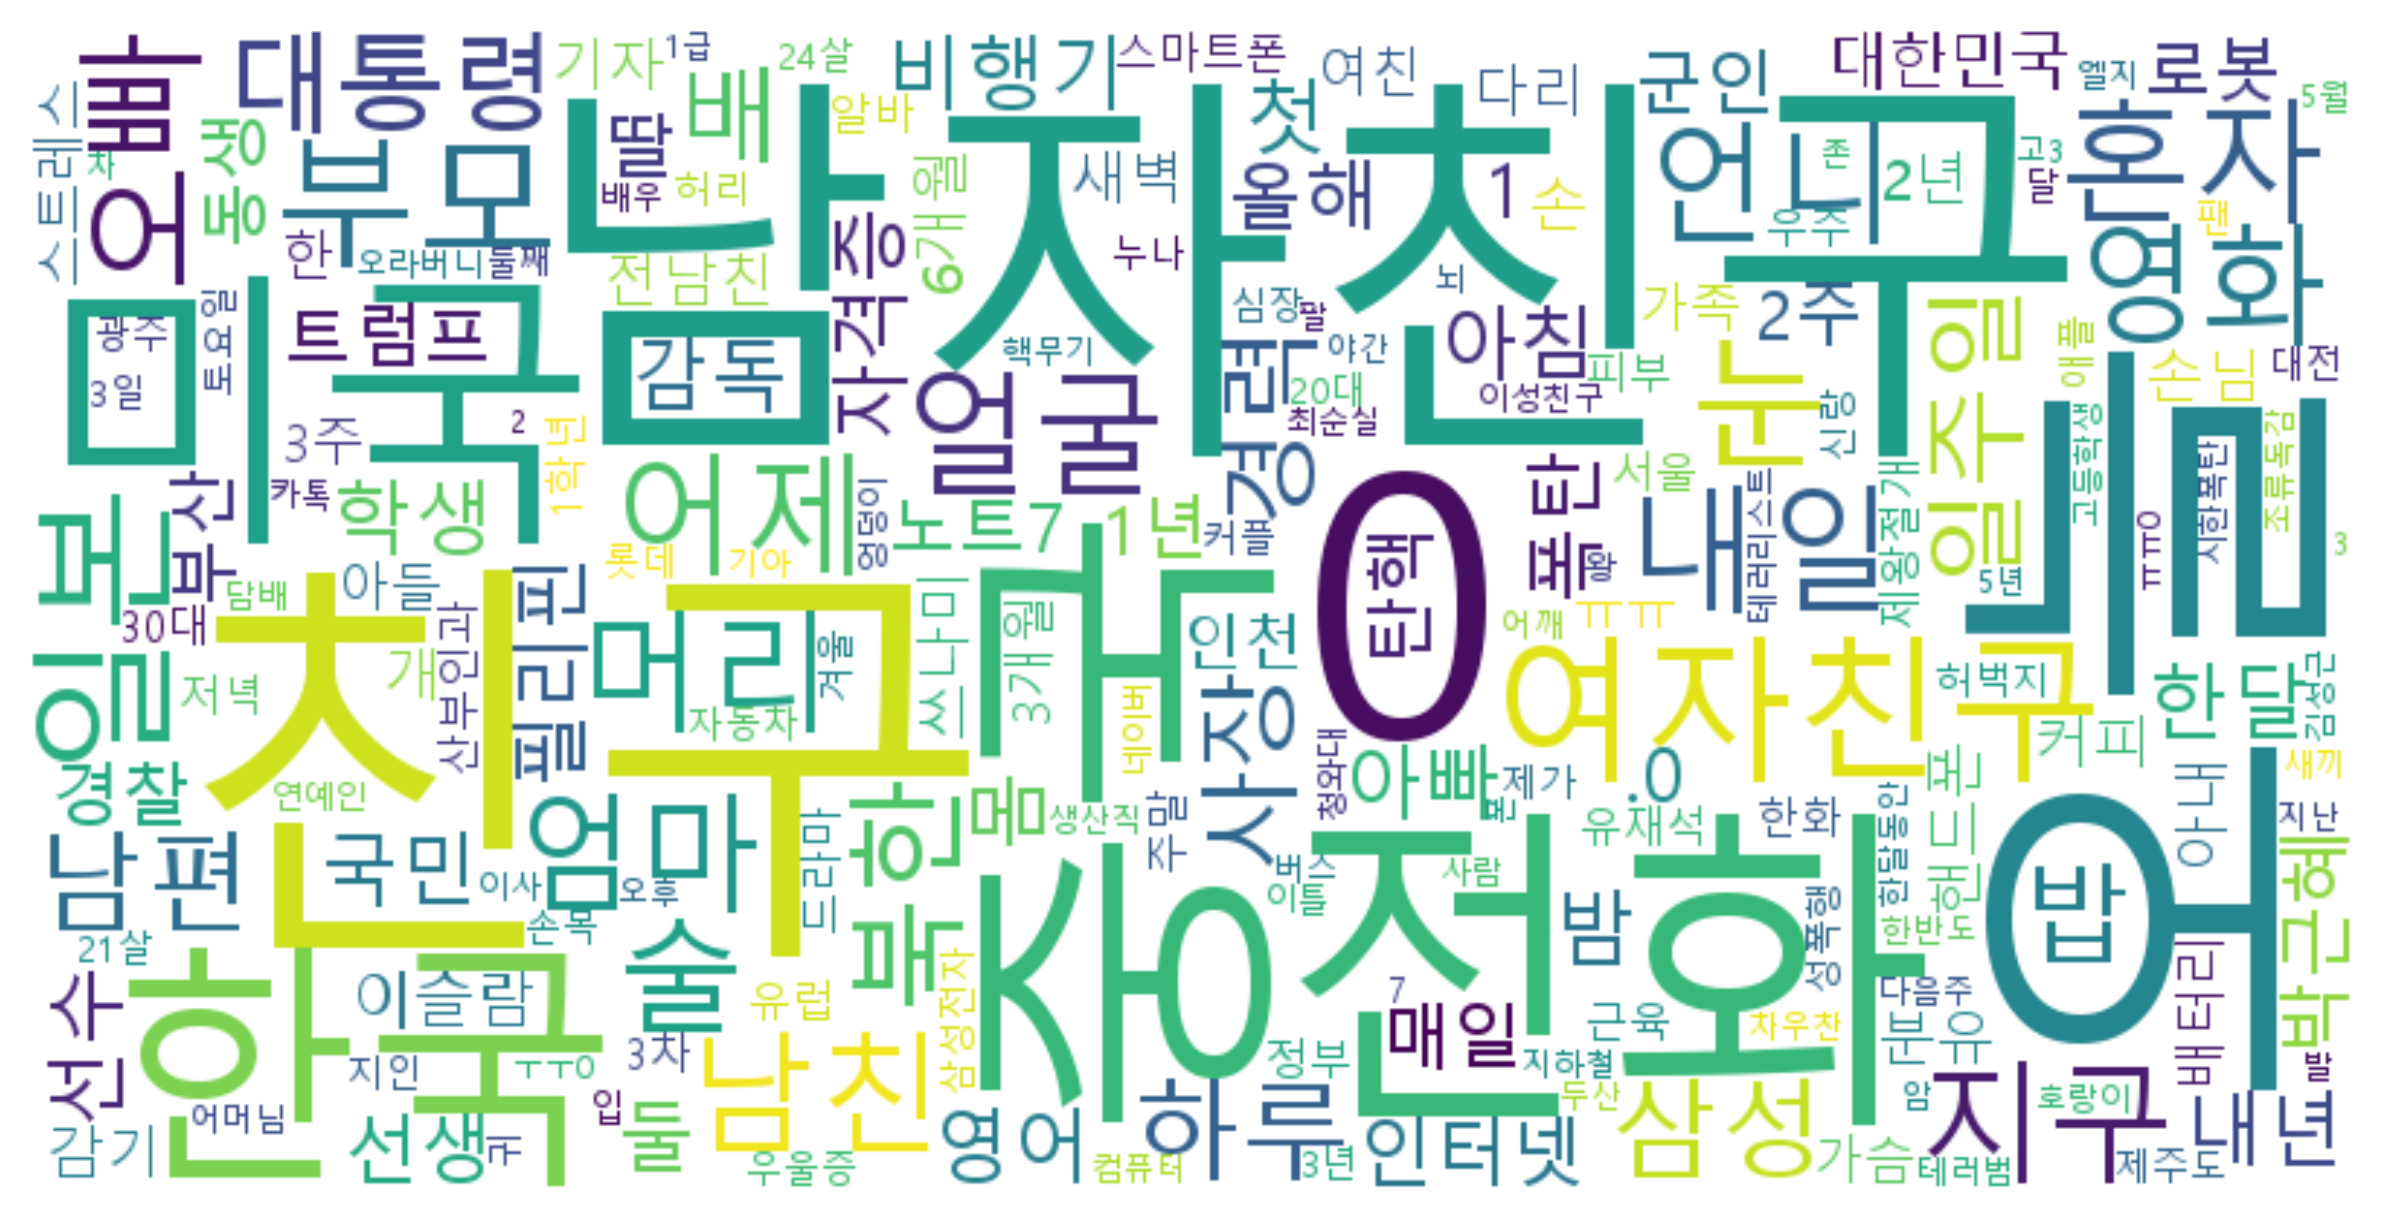

#### 놀람 ####


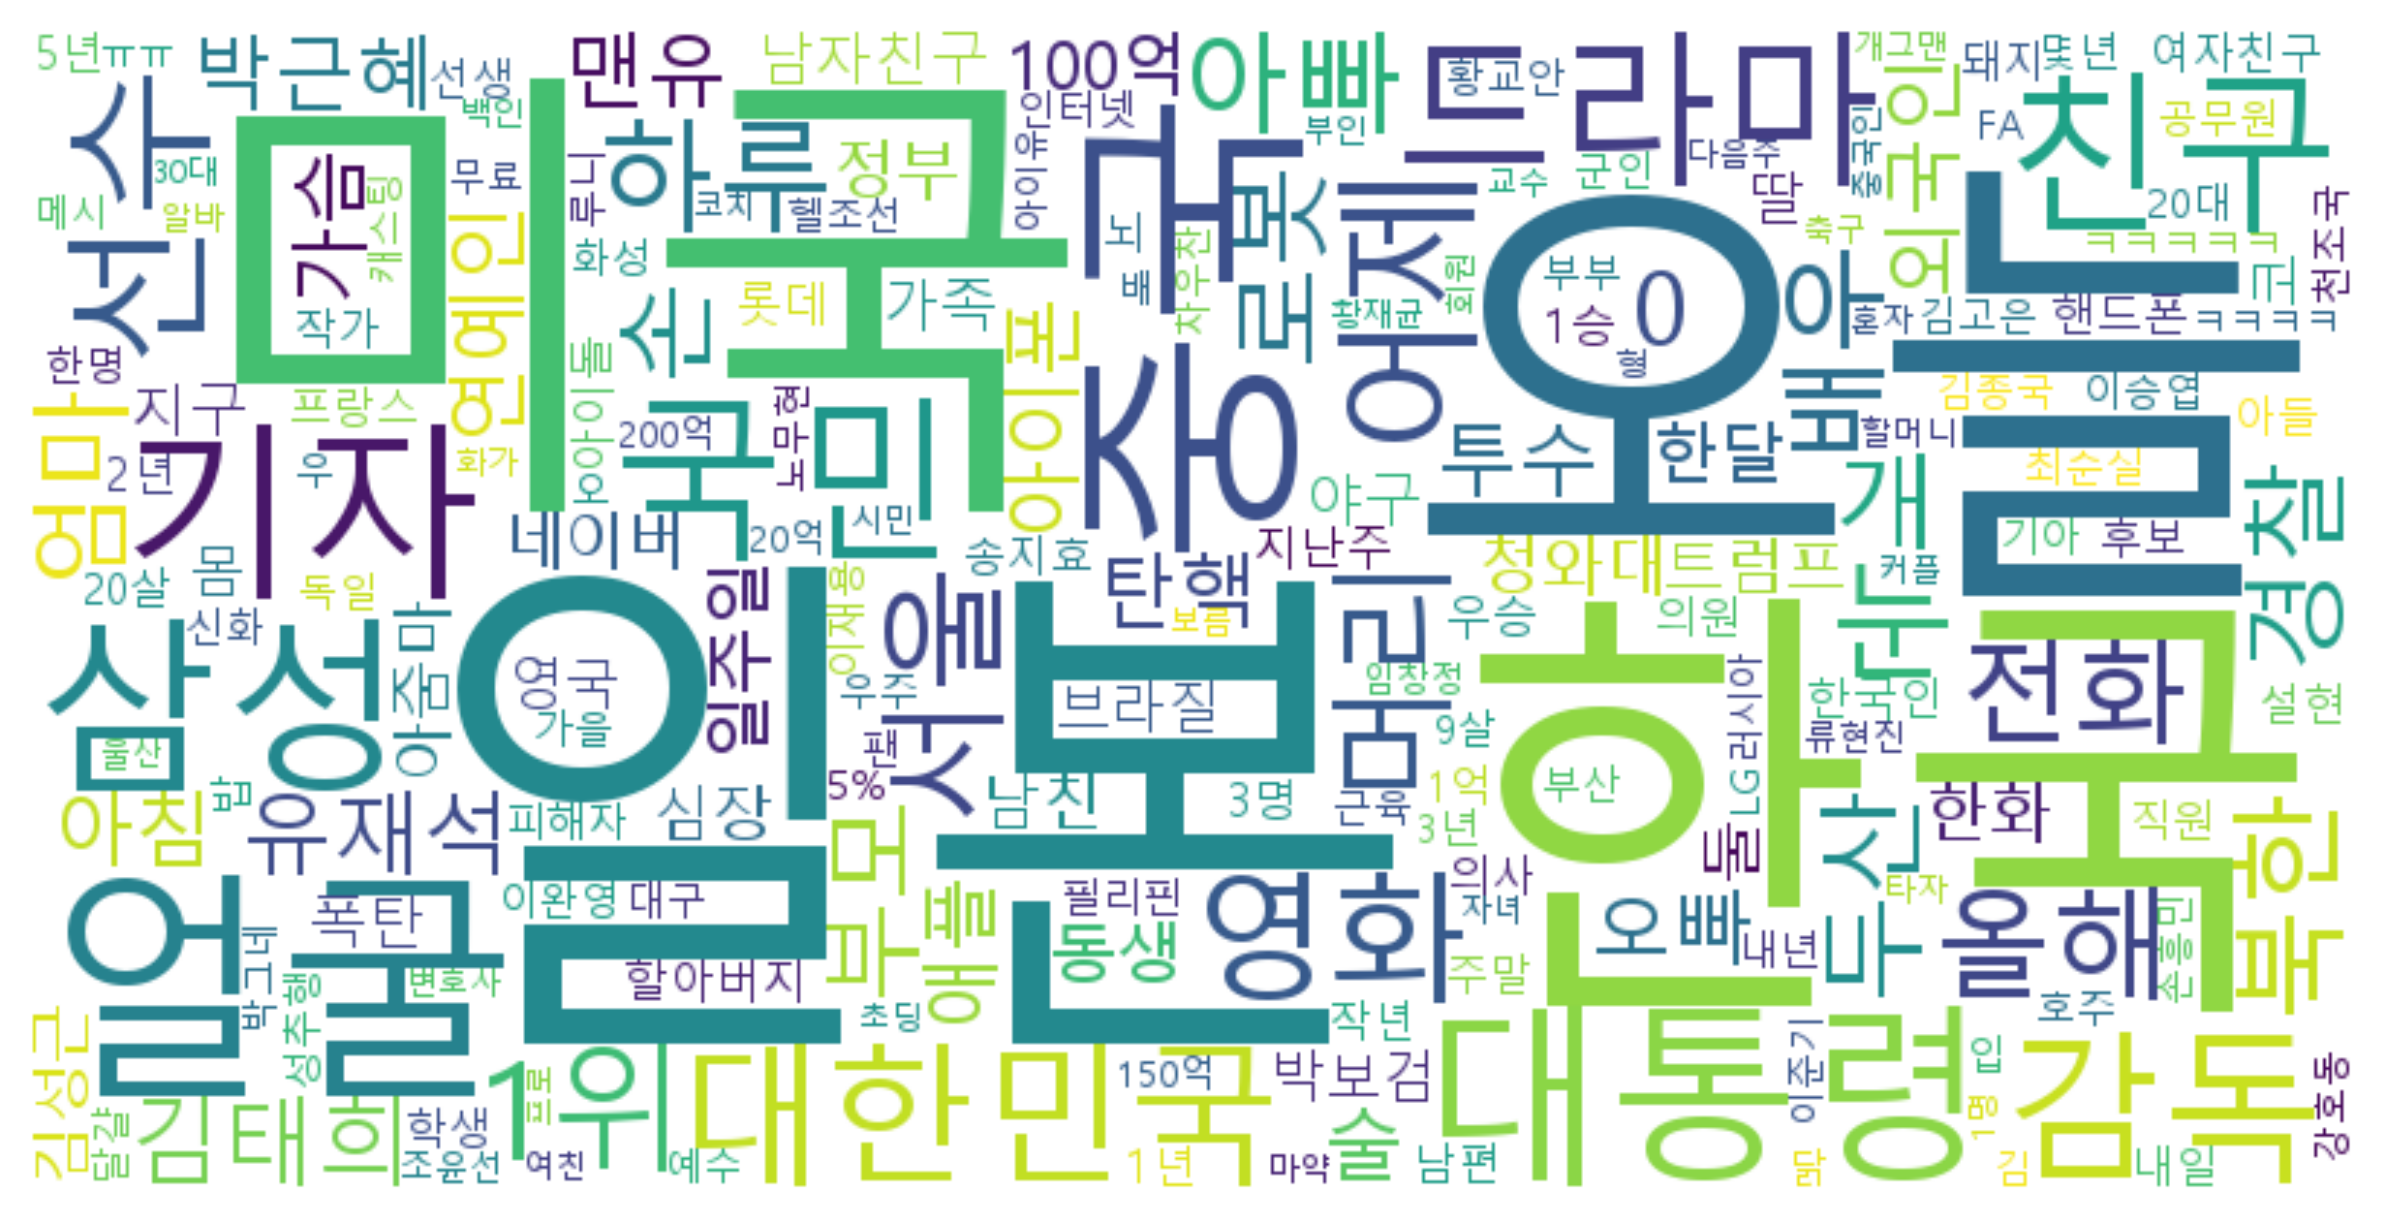

#### 분노 ####


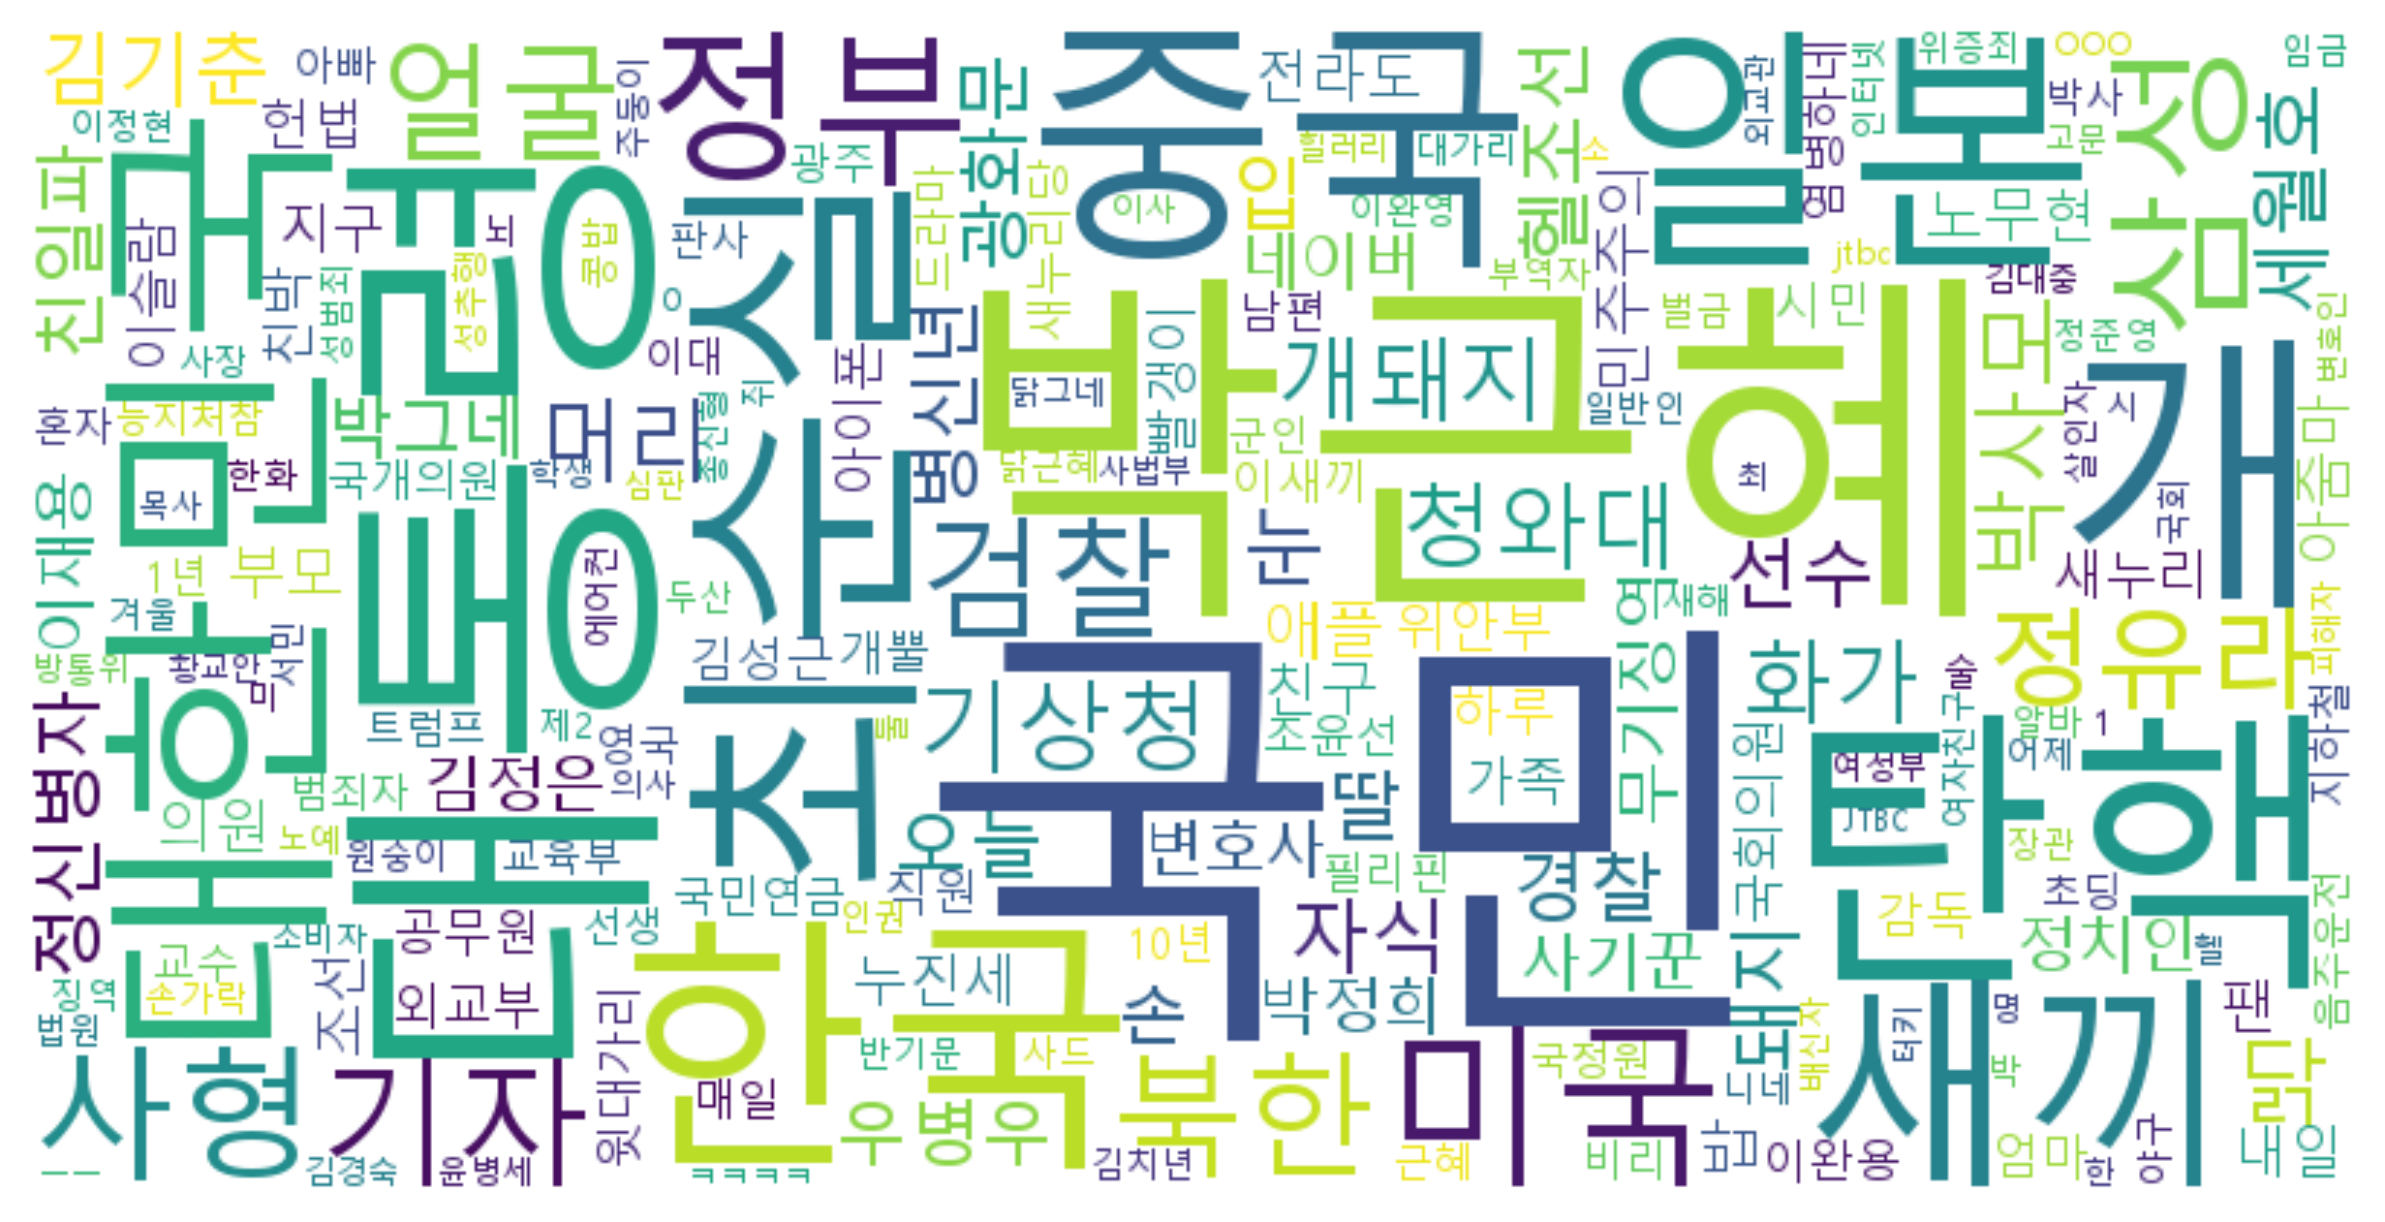

#### 슬픔 ####


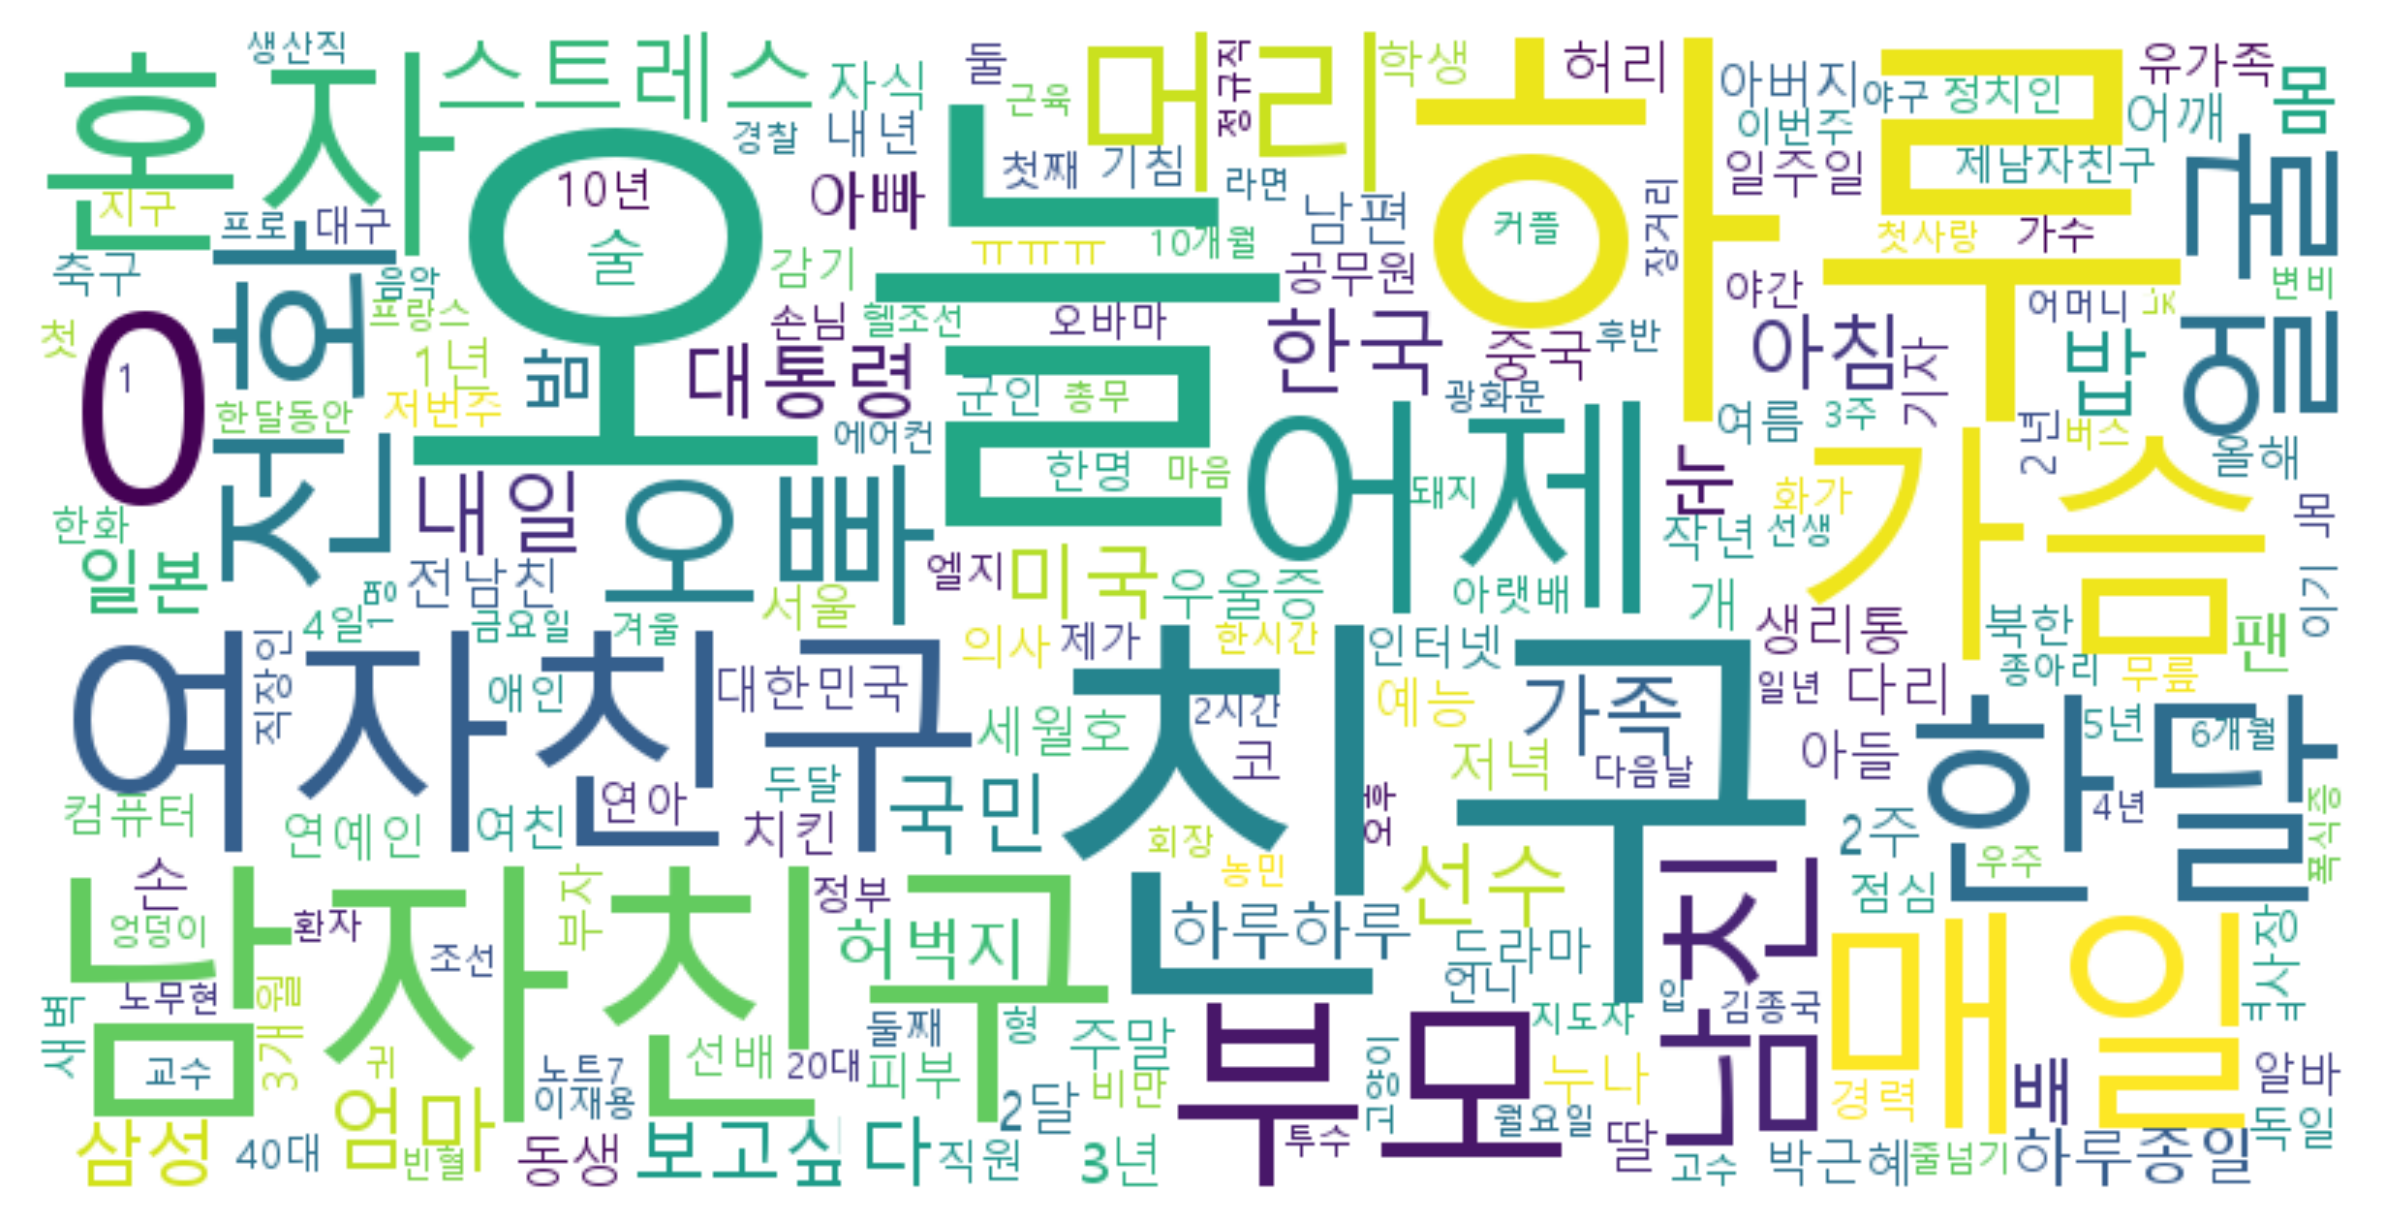

#### 중립 ####


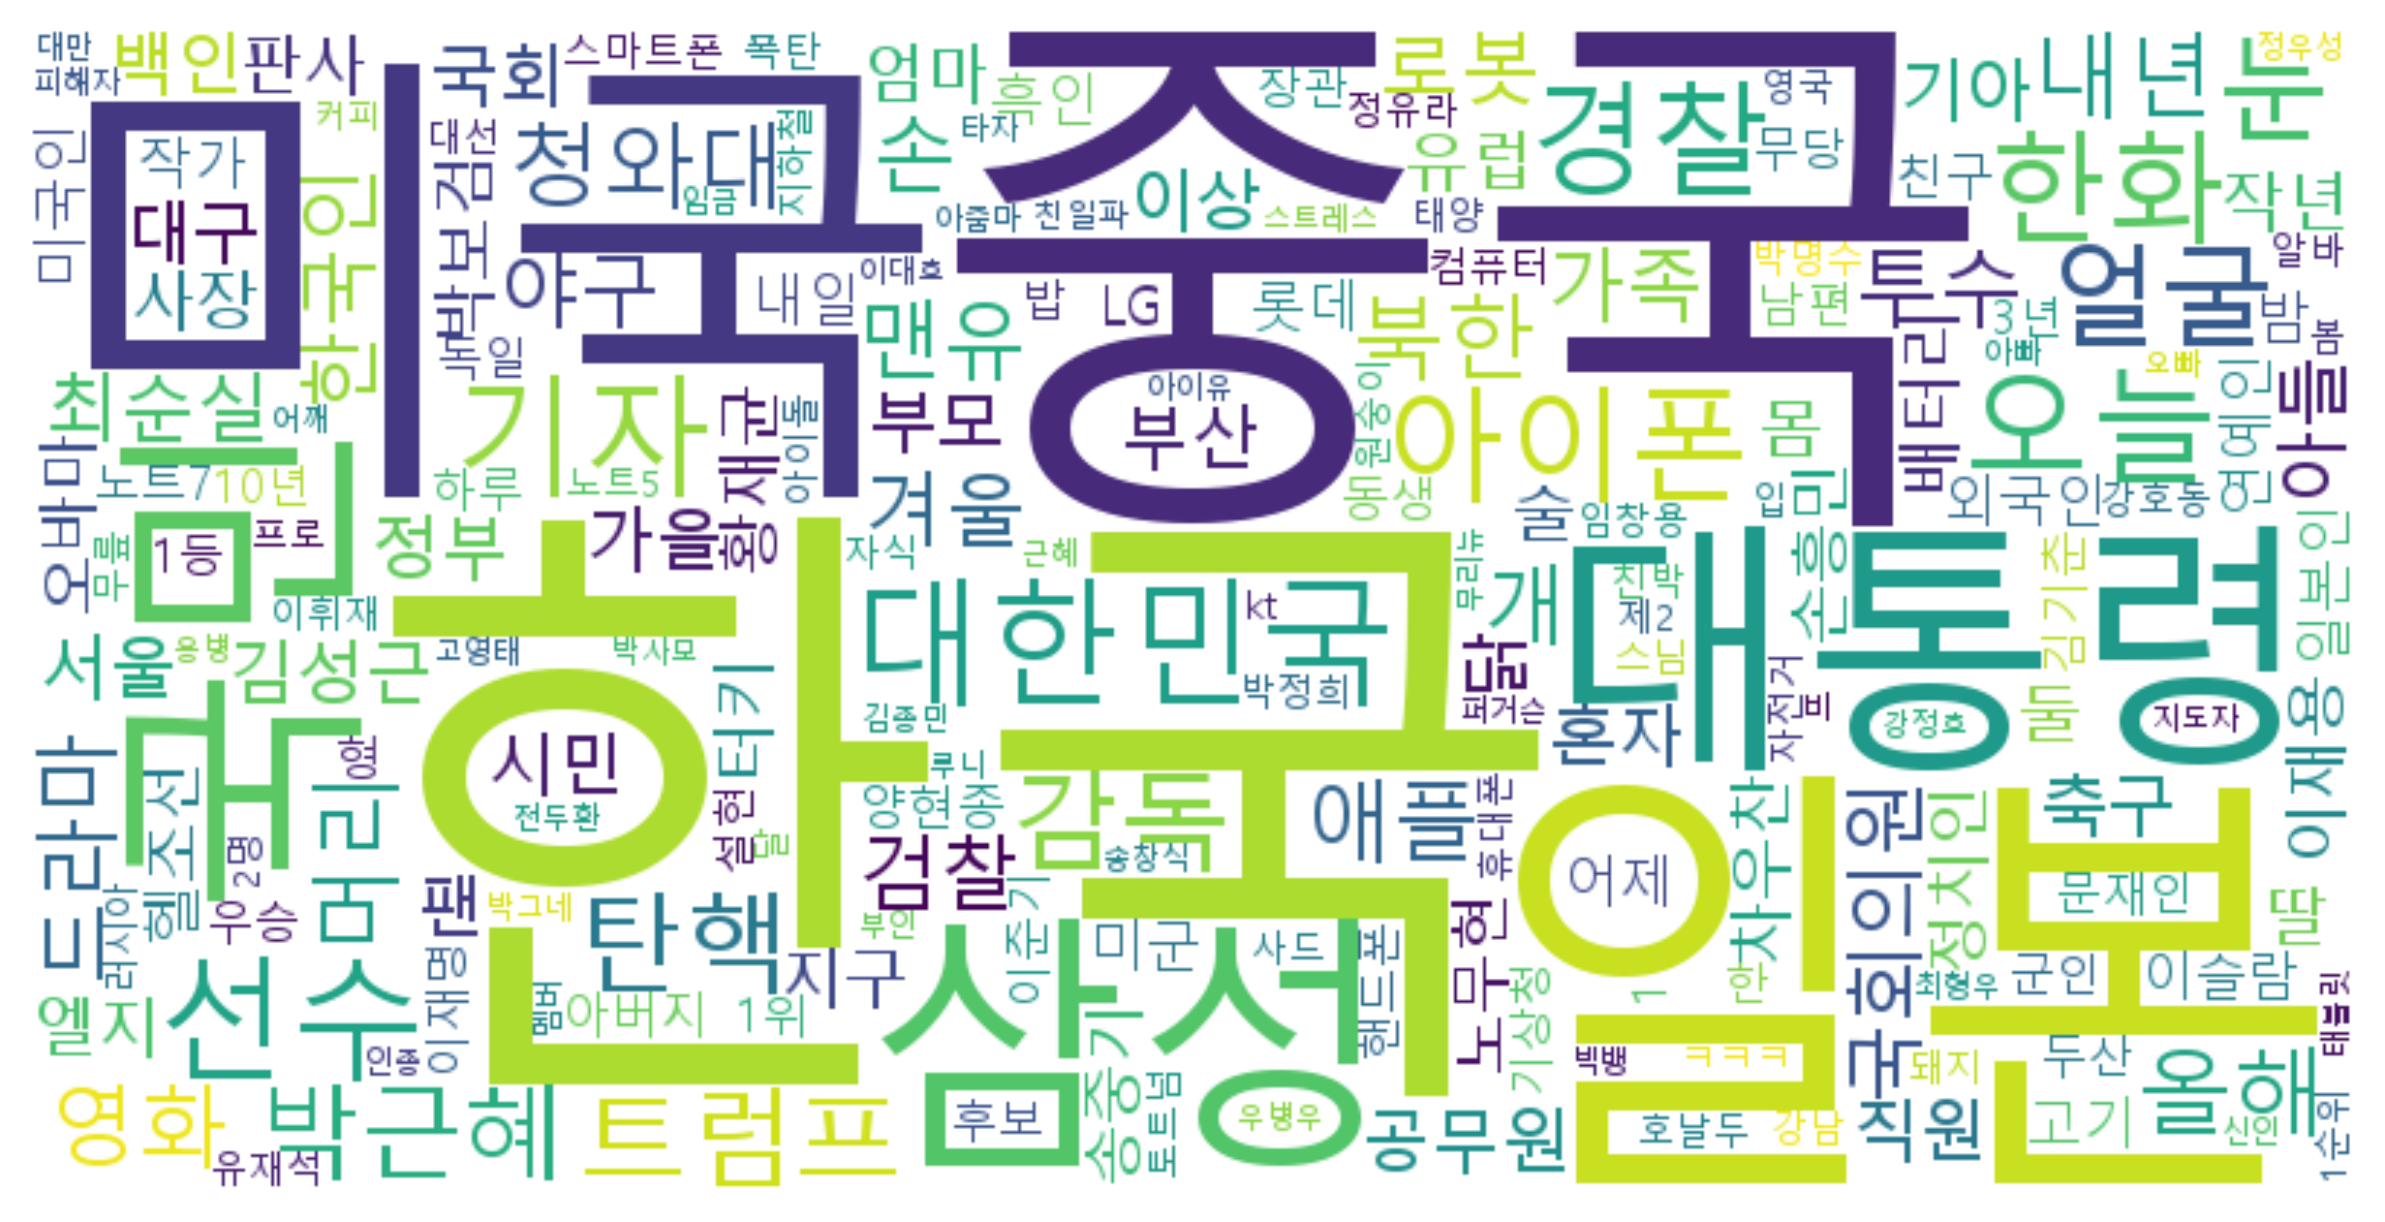

#### 행복 ####


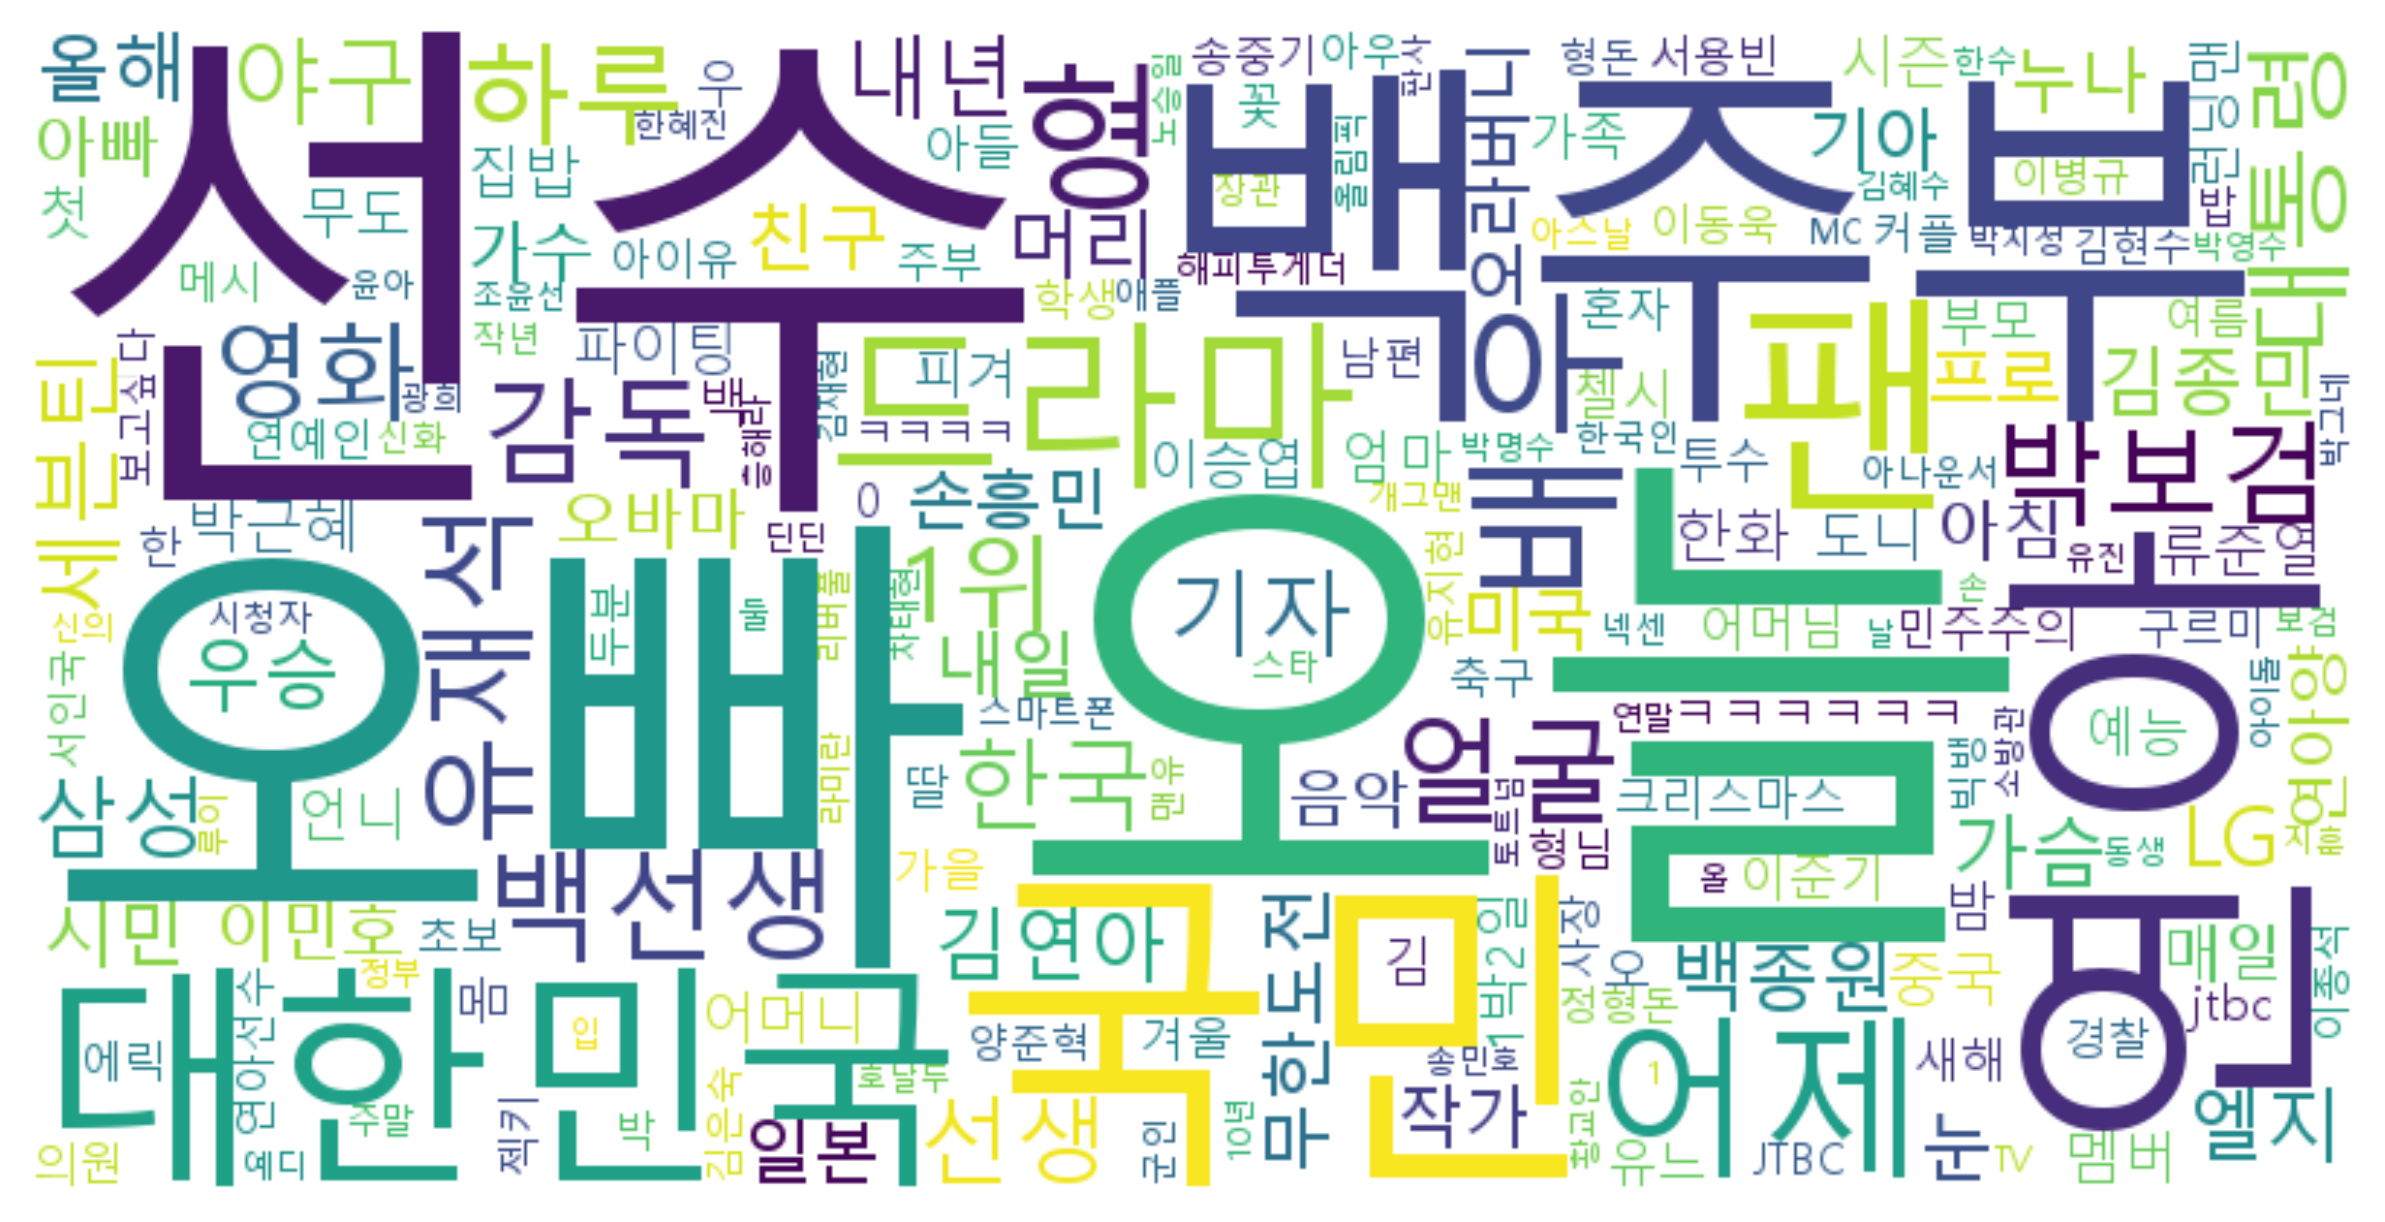

#### 혐오 ####


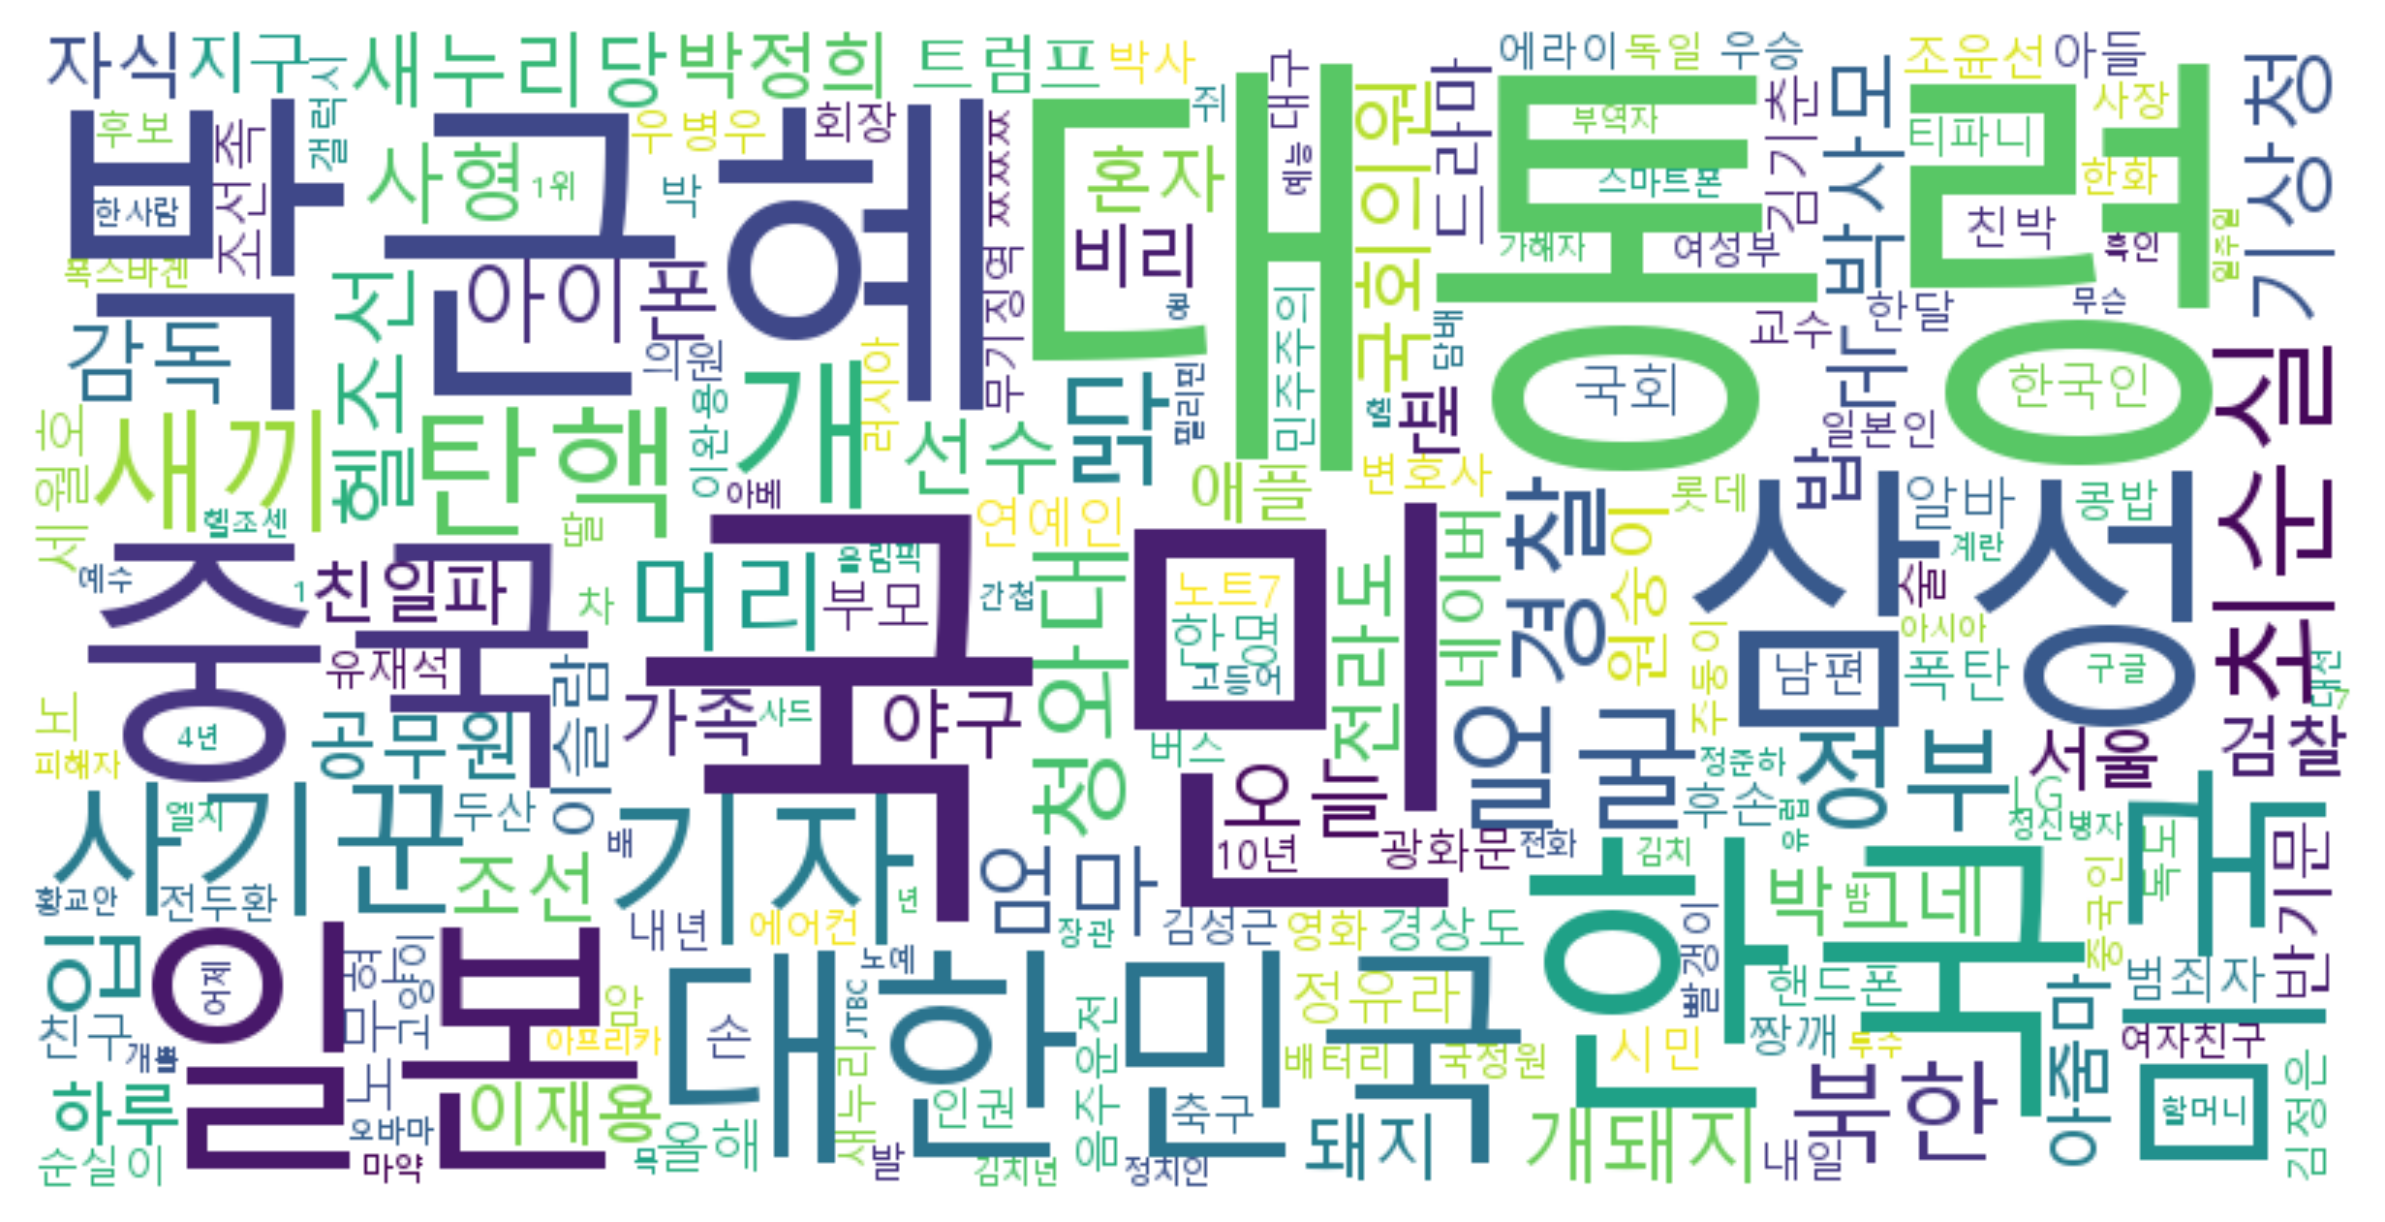

In [59]:
for emotion in emotion_ner.keys():
    draw_wordcloud(emotion)